<a href="https://colab.research.google.com/github/Michaelyzr/ML-in-Finance/blob/main/NN_BS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Black-Scholes Case Study


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importing packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings

# omit repetitive warnings
warnings.filterwarnings('ignore')

# reading training file
df = pd.read_csv("Project2_training.csv")

# normalize stock and call prices in relation to the option's strike price
df['Stock Price'] = df['Stock Price']/df['Strike Price']
df['Call Price']  = df['Call Price'] /df['Strike Price']

# split data into training and testing sets
n = 3000
n_train =  (int)(0.8 * n)

# select training set and define independent and dependent variable (call price)
train = df[0:n_train]
X_train = train[['Stock Price', 'Maturity', 'Dividends', 'Volatility', 'Risk-free']].values
y_train = train['Call Price'].values

# select testing set and define independent and dependent variable (call price)
test = df[n_train+1:n]
X_test = test[['Stock Price', 'Maturity', 'Dividends', 'Volatility', 'Risk-free']].values
y_test = test['Call Price'].values

In [ ]:
# to build the neural we will use Keras due to its friendly API
# https://keras.io/api/

# importing Keras classes to build the neural networks
from keras.models import Sequential # https://keras.io/api/models/sequential/

# keras provides layers api to construct the neural network
from keras.layers import Dense, Dropout, Activation, LeakyReLU, ReLU #https://keras.io/api/layers/

from keras import backend
def custom_activation(x):
    return backend.exp(x)

2022-11-24 18:58:17.506568: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Part A: Contruct Neutral Networks

### Single (One-layer) Neutral Network

In [ ]:
activations = ['relu', 'tanh', 'sigmoid']
optimizers = ['rmsprop','sgd', 'adam']
epochs = [100, 500, 1000]

In [ ]:
def snn_runner(activation:str, optimizer: str, epochs:int):
  np.random.seed(0)
  # assume 300 neurons
  nodes = 300
  # initialize the mode as Sequential class - the next steps we will add layers to it
  model = Sequential()

  # to add a layer we call the add method from model (Sequential) and pass as argument the Dense class
  model.add(Dense(nodes, activation=activation, input_dim=X_train.shape[1])) # activation = 'relu', 'tanh', 'sigmoid'

  # since we want to predict a single value we add one additional layer with one neuron
  model.add(Dense(1))

  # we will use our customized activation function
  model.add(Activation(custom_activation))

  # compile the model
  model.compile(loss='mse', optimizer=optimizer)

  # fit the model
  history = model.fit(X_train, y_train, batch_size=64, epochs=epochs, validation_split=0.1, verbose=0,
                            validation_data=(X_test, y_test))

  # print the model parameters
  #print(model.summary())
  convergence=history.history

  # plot the model learning history
  pd.DataFrame(history.history).plot(figsize=(8,5), logy=True)
  plt.title('Single NN Training Evolution with ' + activation + ' Nodes: ' + str(nodes) + ' ' + optimizer + ' Epochs: ' + str(epochs))
  plt.ylabel('Log MSE')

  plt.xlabel('Iteration')
  plt.grid(True)

  return model, convergence

2022-11-24 18:58:38.058418: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


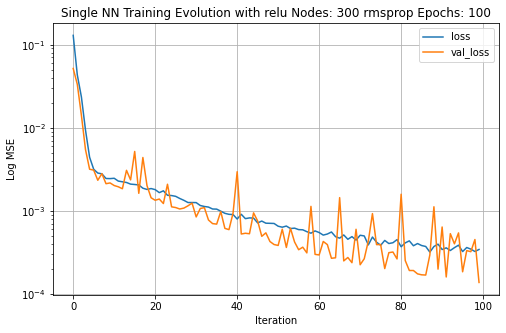

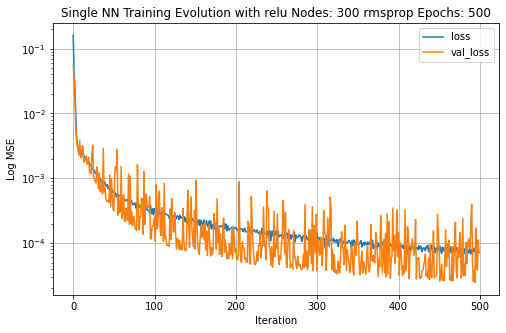

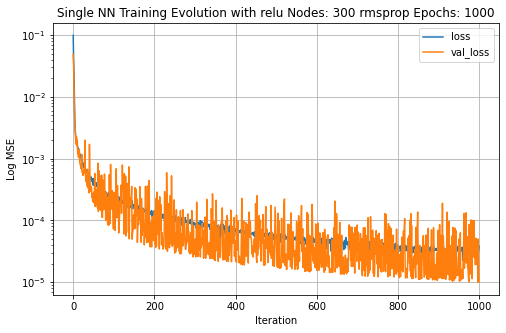

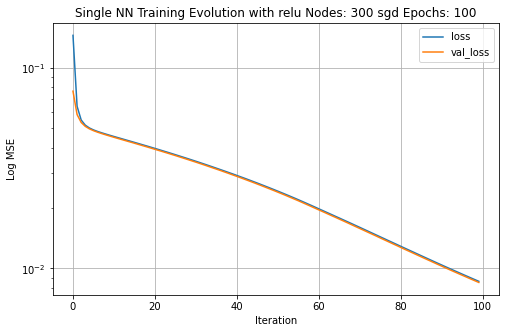

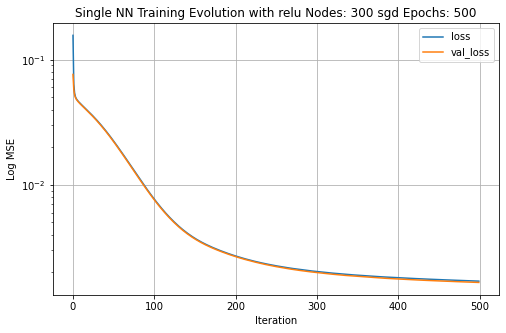

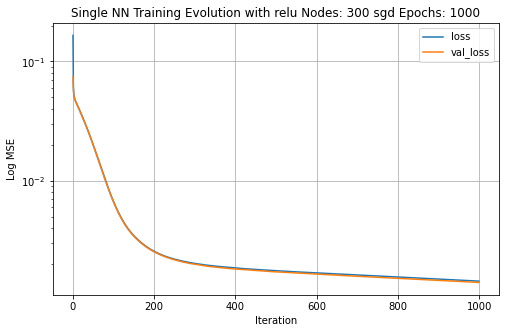

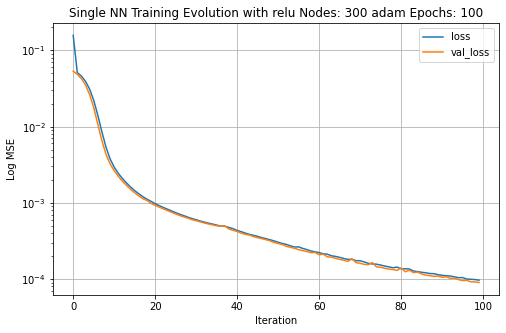

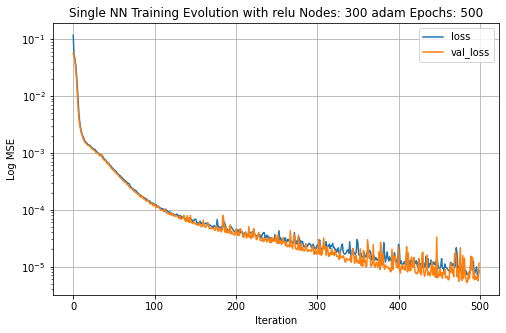

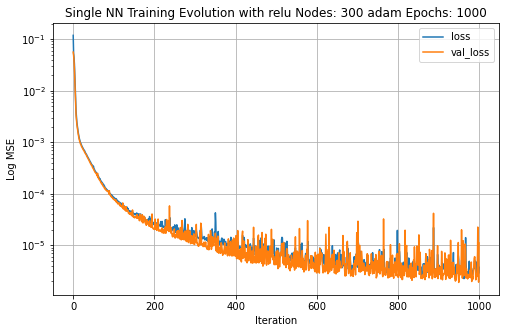

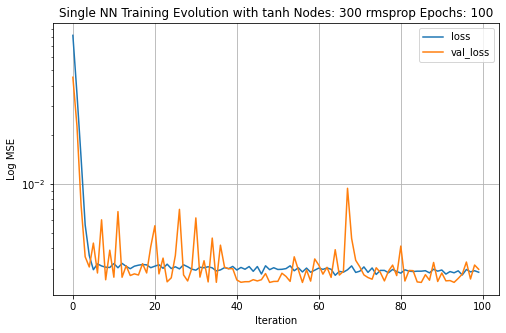

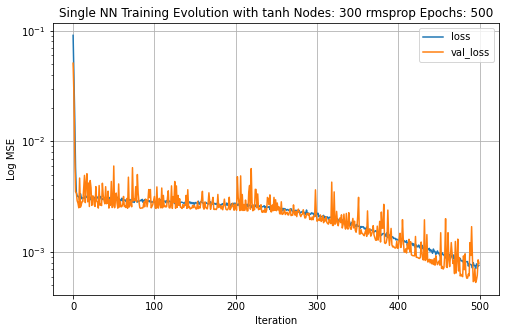

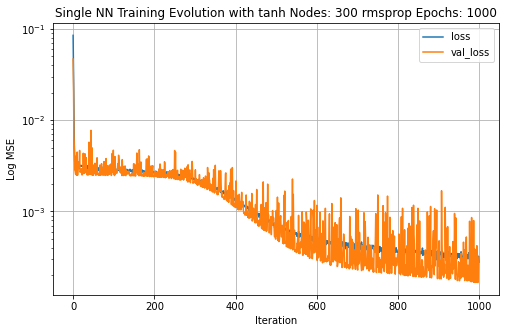

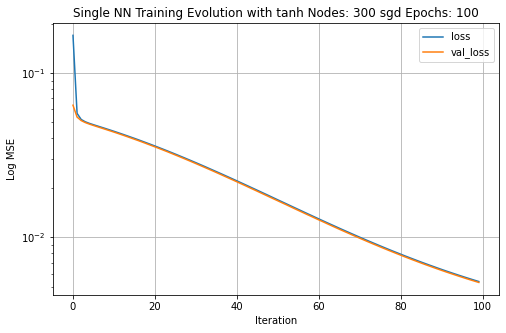

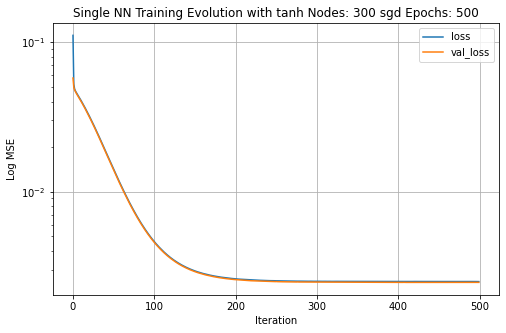

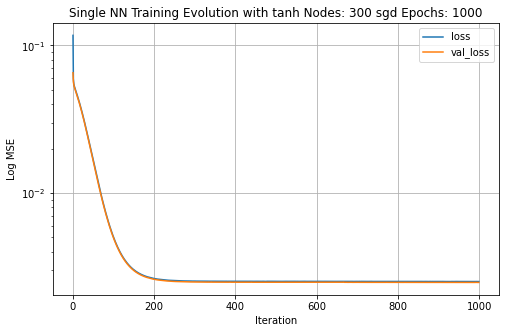

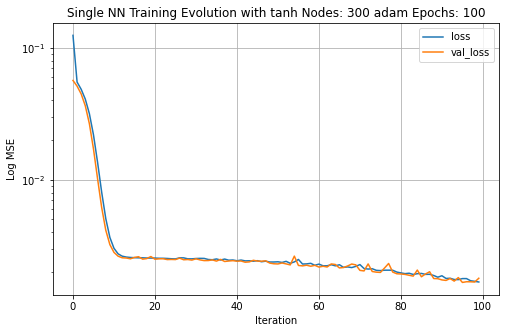

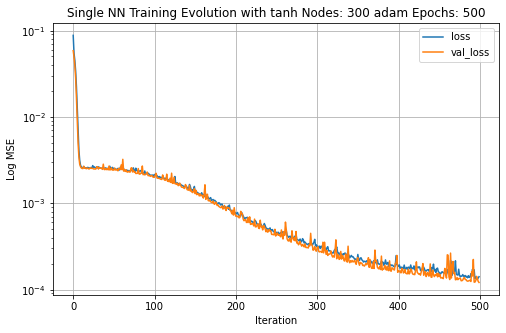

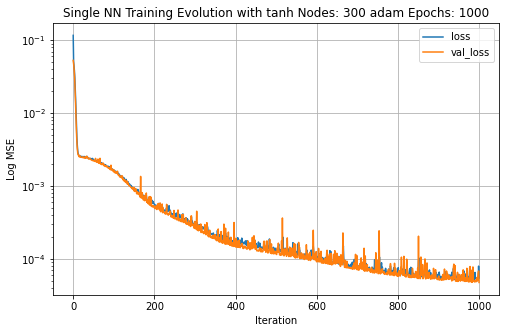

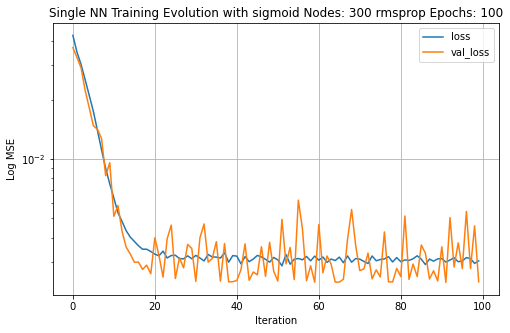

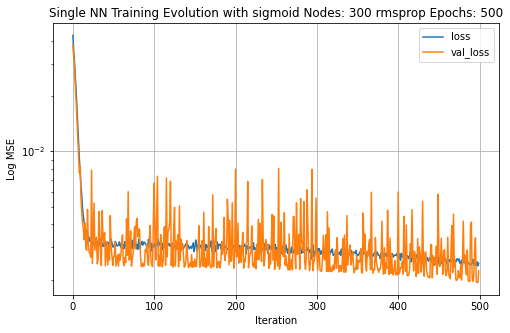

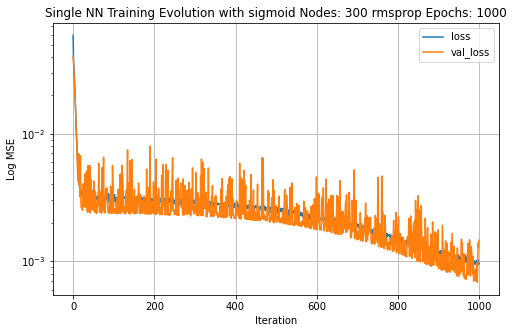

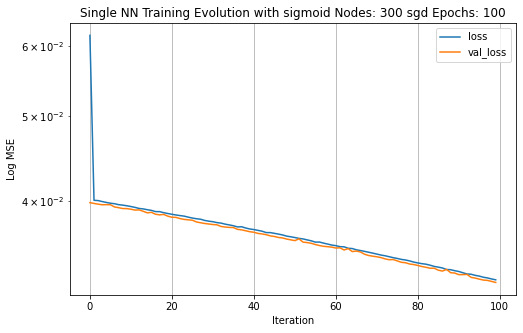

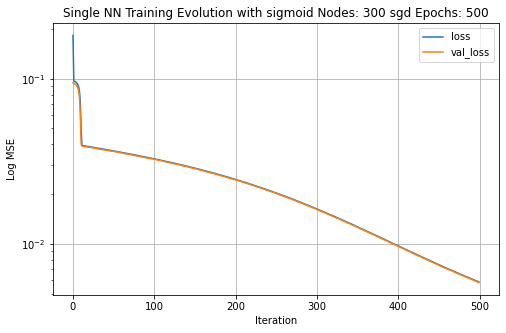

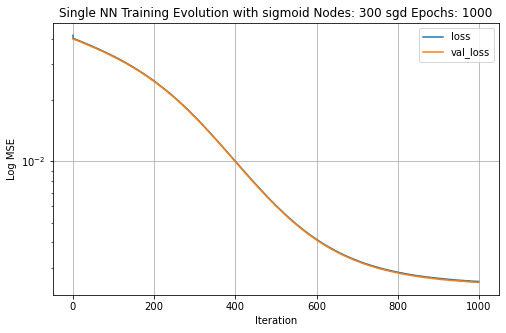

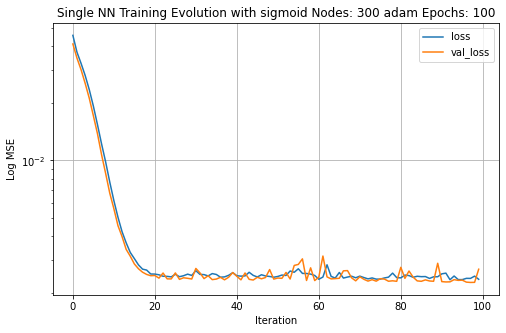

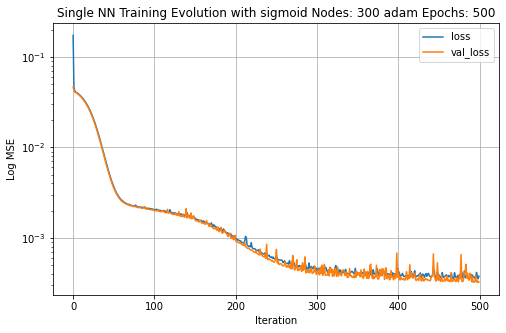

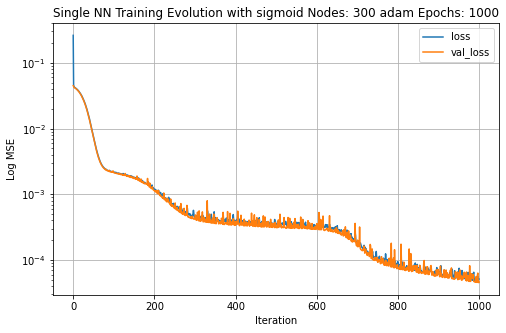

In [ ]:
snn_models = {}
nodes = 300
for activation in activations:
  for optimizer in optimizers:
    for epoch in epochs:
      snn_models['SNN' + ' ' + activation + ' Nodes: ' + str(nodes) + ' ' + optimizer + ' Epochs: ' + str(epoch)] = snn_runner(activation, optimizer, epoch)

### Deep (three-layer) Neural Networks

In [ ]:
activations = ['relu', 'tanh', 'sigmoid']
nodes = [10, 50, 100]
optimizers = ['rmsprop', 'sgd', 'adam']
epochs = [100, 500, 1000]

In [ ]:
def dnn_runner(activation:str, nodes: int, optimizer: str, epochs:int):
  np.random.seed(0)
  # initialize the mode as Sequential class - the next steps we will add layers to it
  model2 = Sequential()

  # add the first layer of 100 neurons - for the first layer you must declare the number of features through input_dim arguments
  model2.add(Dense(nodes, activation=activation, input_dim=X_train.shape[1]))

  # add second layer of 100 neurons - no need to declare the input dimensions, keras does that automatically
  model2.add(Dense(nodes, activation=activation))

  # add third layer of 100 neurons
  model2.add(Dense(nodes, activation=activation))

  # output layer is the same as the single NN
  model2.add(Dense(1))
  model2.add(Activation(custom_activation))

  # compile the model
  model2.compile(loss='mse', optimizer=optimizer)

  history = model2.fit(X_train, y_train, batch_size=512, epochs=epochs, validation_split=0.1, verbose=0,
                            validation_data=(X_test, y_test))

  # print the model parameters
  #print(model.summary())
  convergence=history.history

  # plot the model learning history
  pd.DataFrame(history.history).plot(figsize=(8,5), logy=True)
  plt.title('Deep NN Training Evolution with ' + activation + ' Nodes: ' + str(nodes) + ' ' + optimizer + ' Epochs: ' + str(epochs))
  plt.ylabel('Log MSE')
  plt.xlabel('Iteration')
  plt.grid(True)

  return model2, convergence

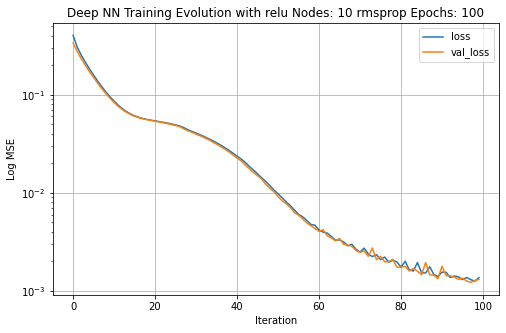

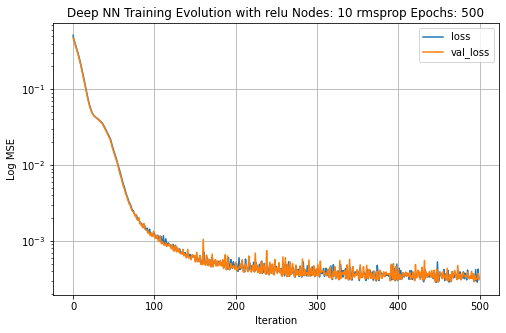

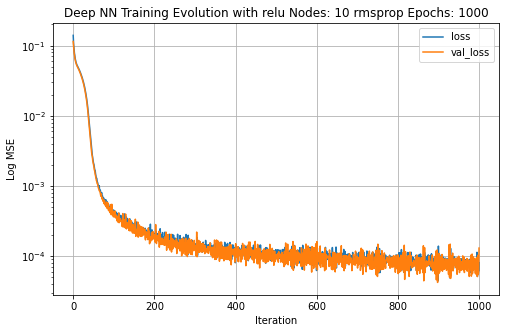

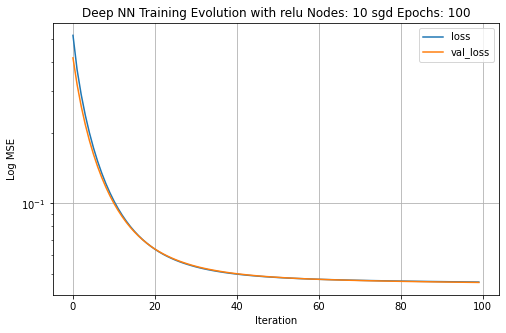

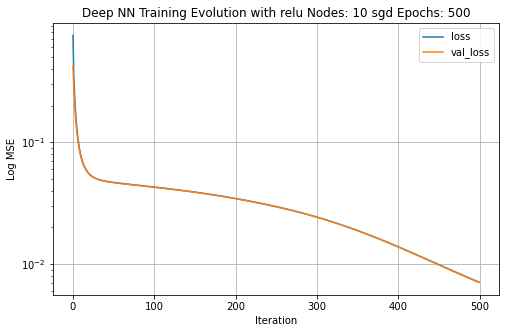

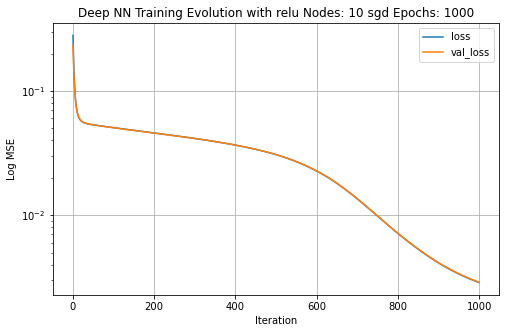

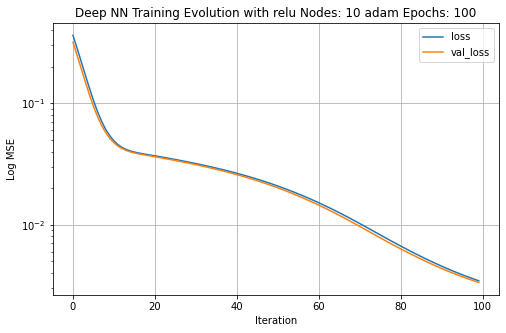

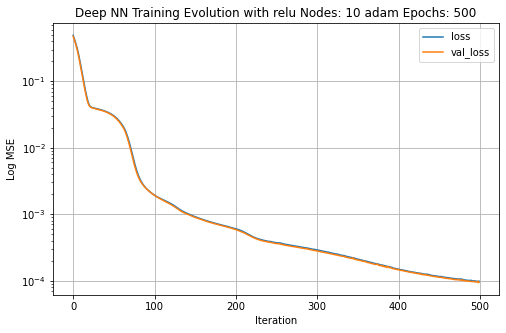

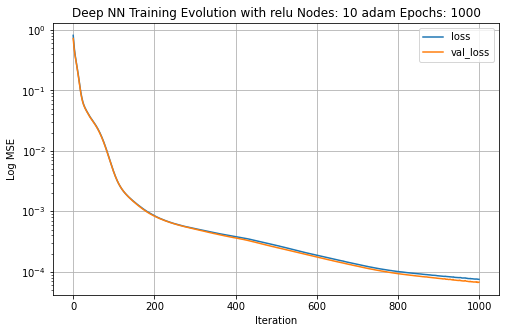

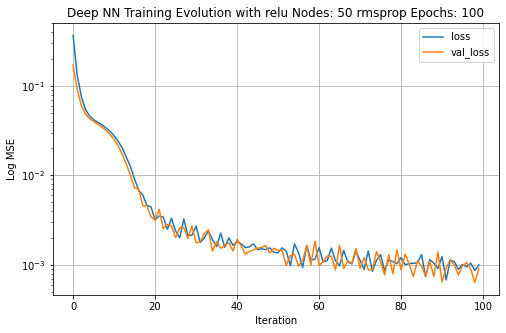

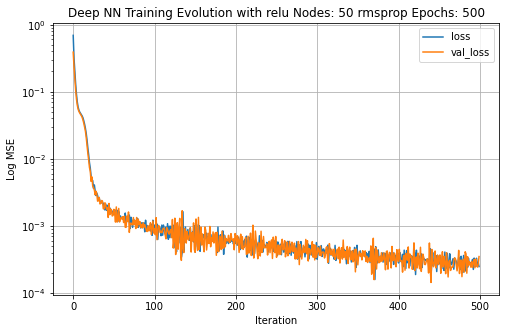

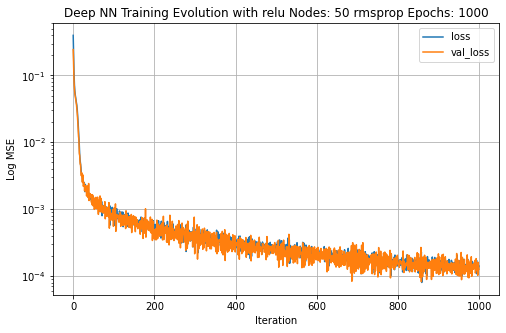

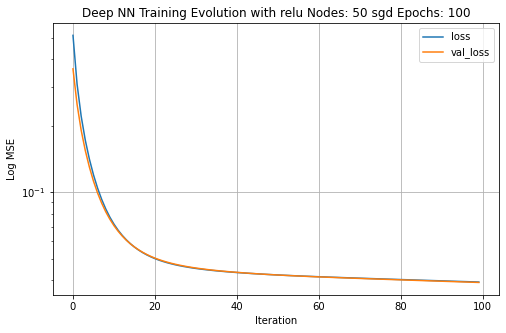

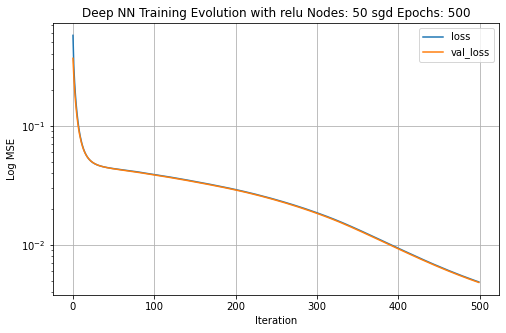

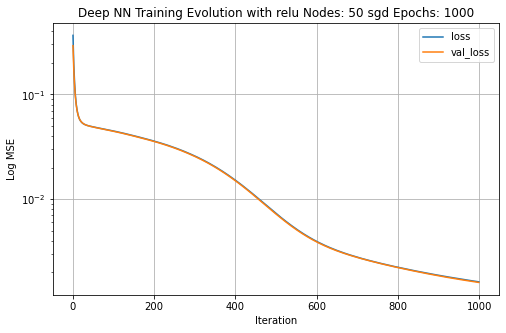

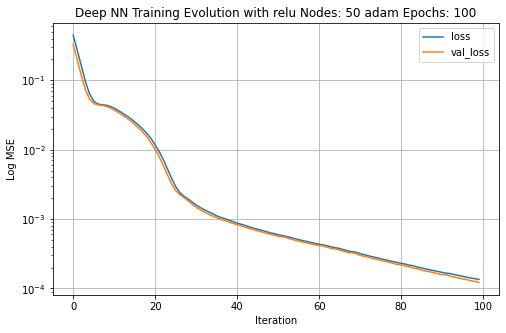

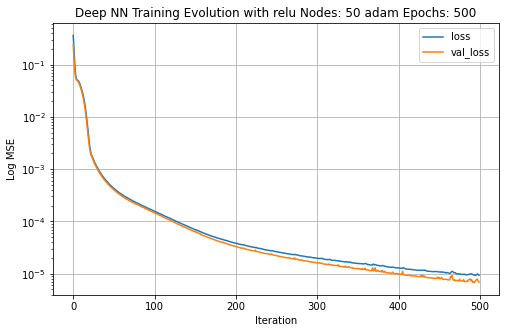

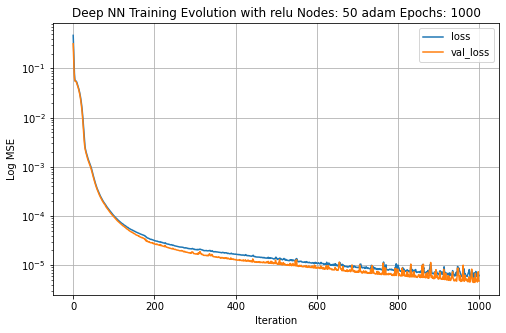

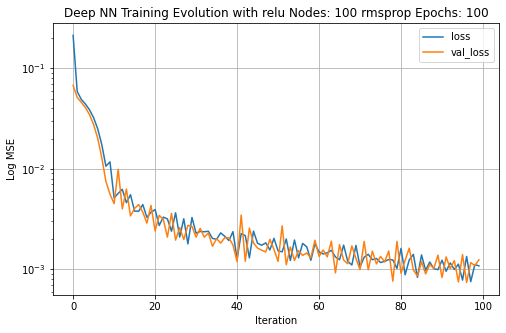

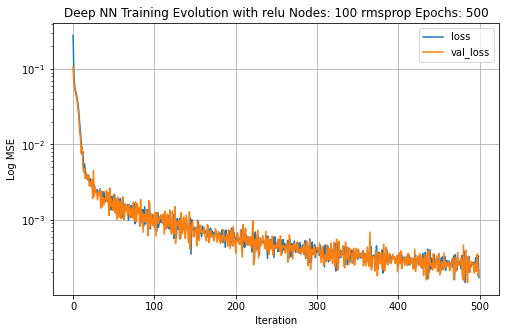

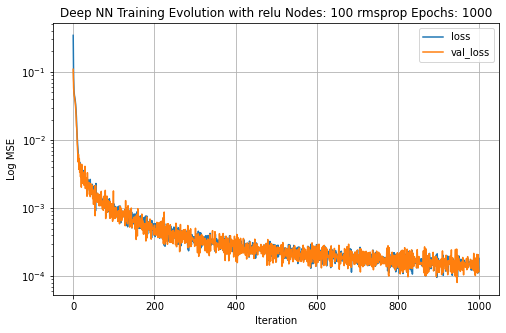

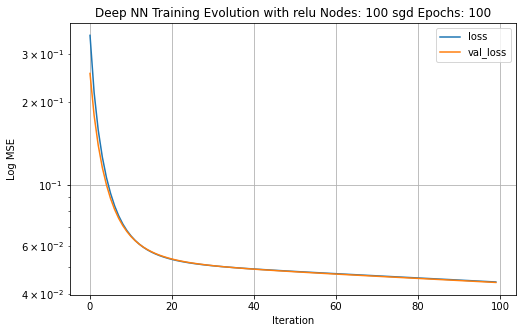

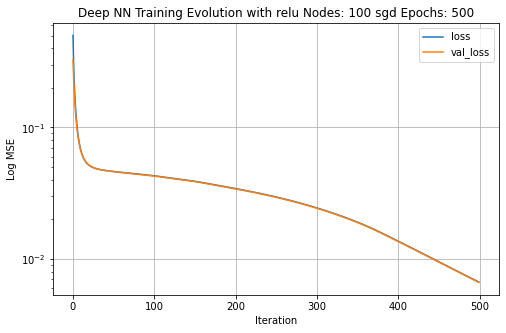

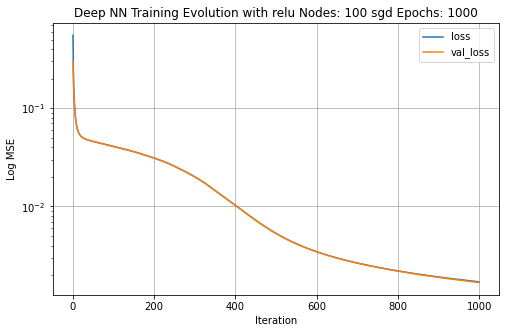

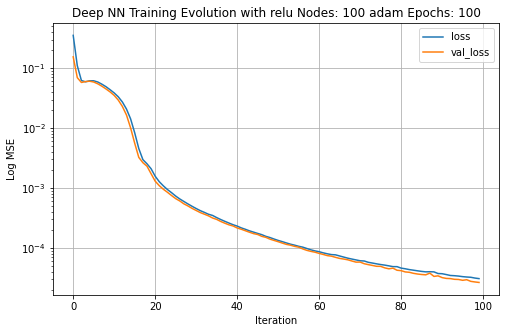

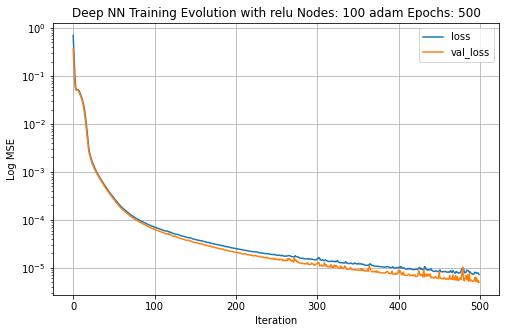

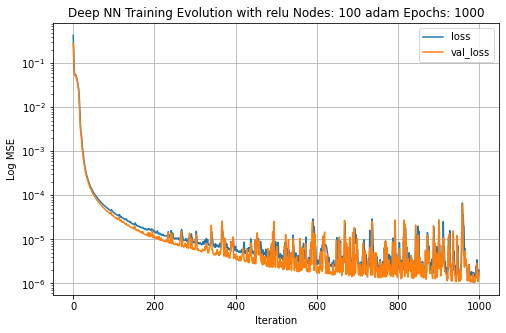

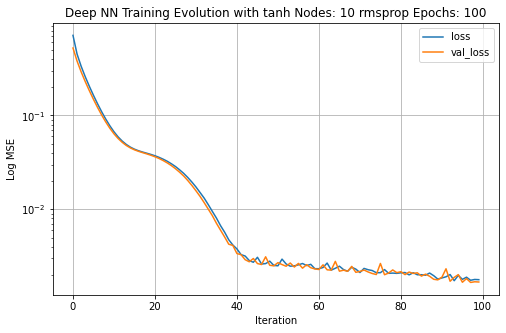

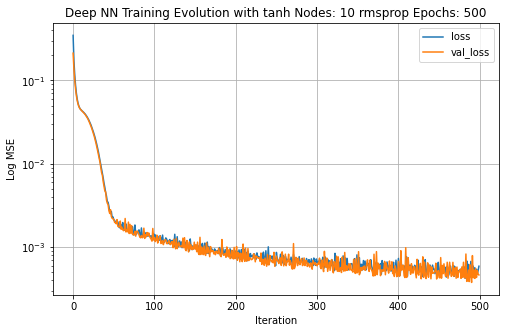

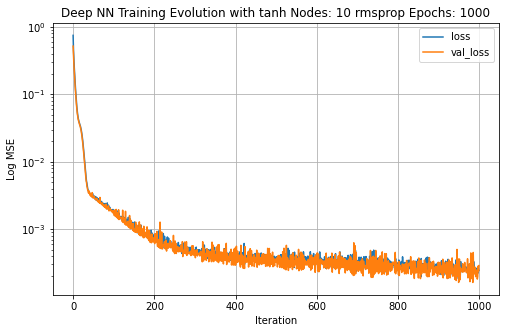

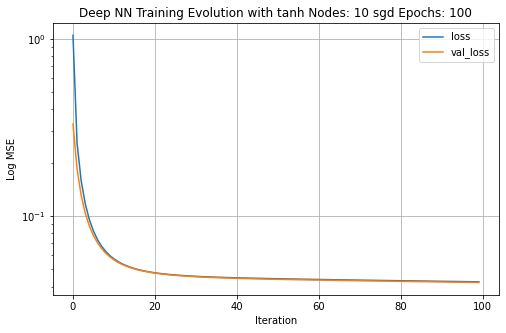

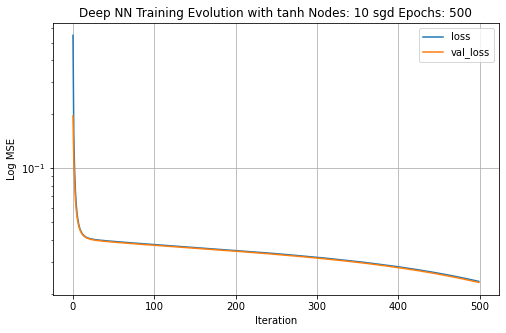

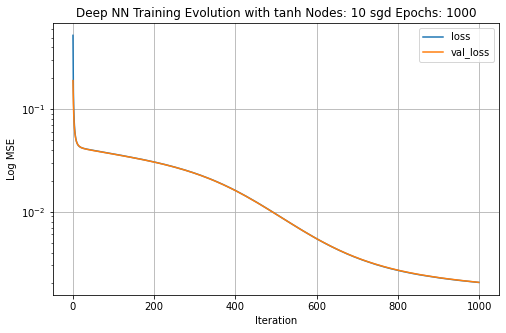

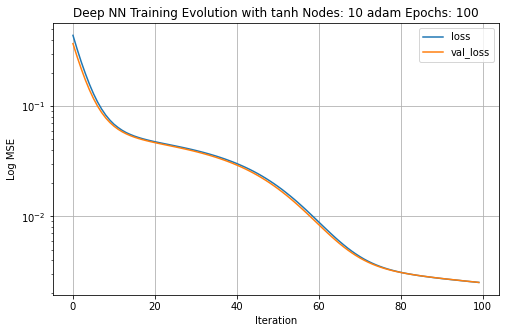

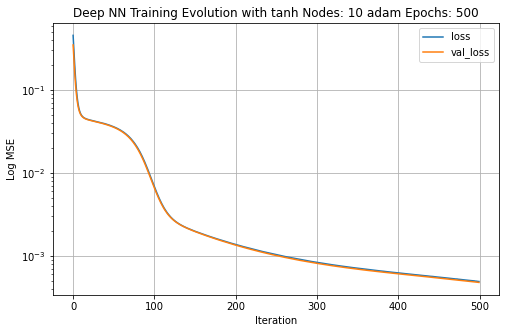

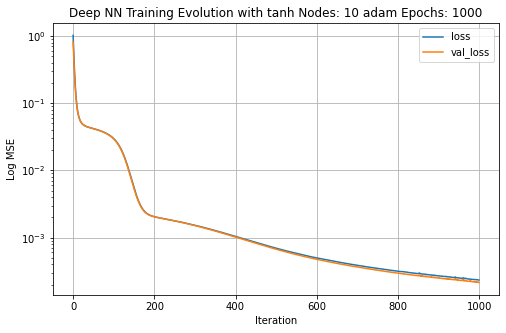

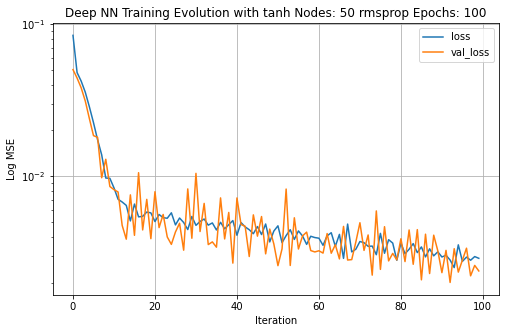

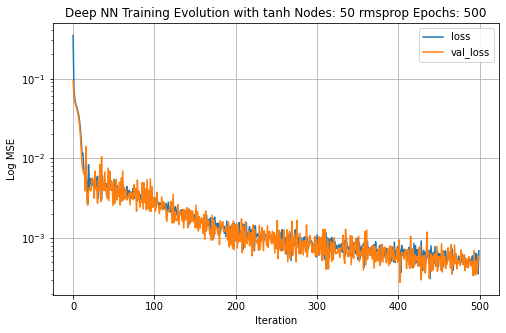

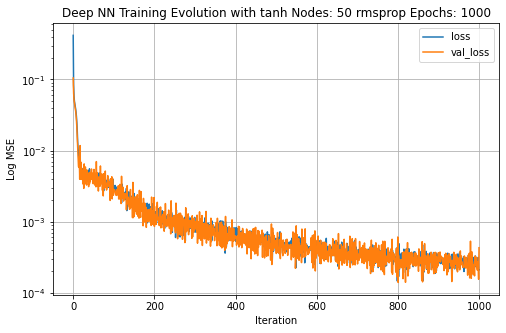

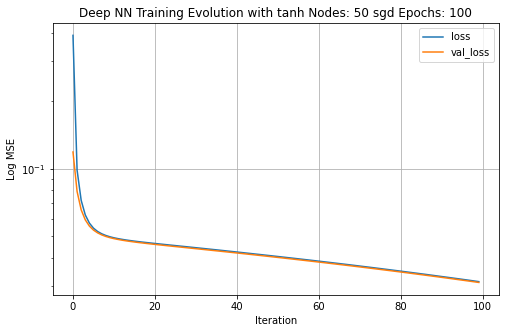

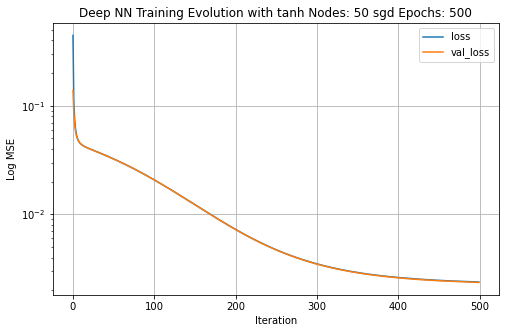

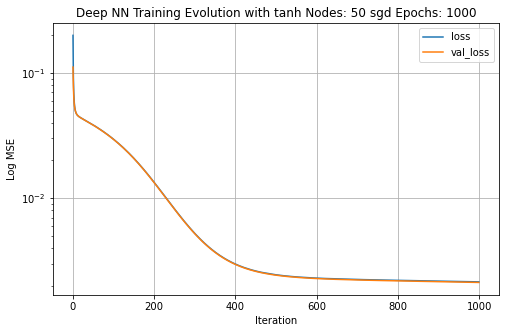

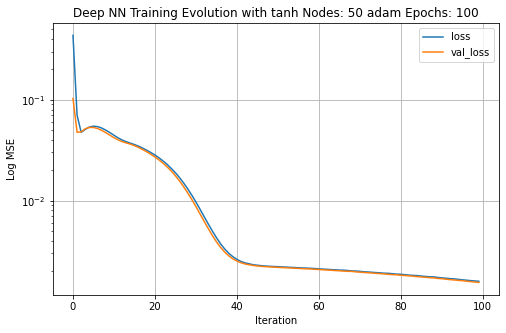

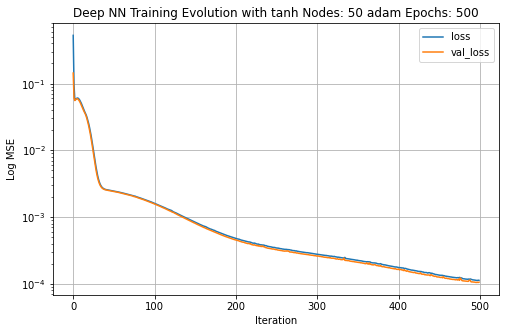

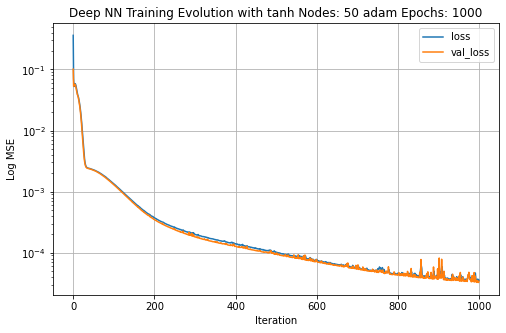

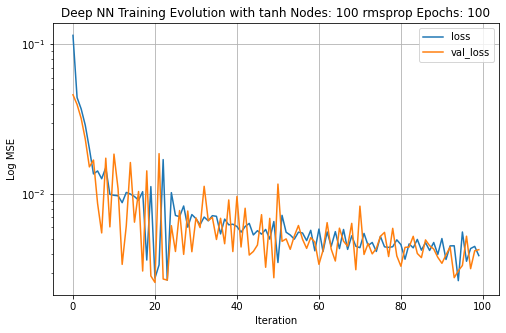

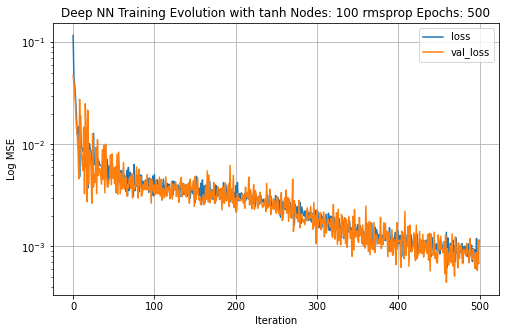

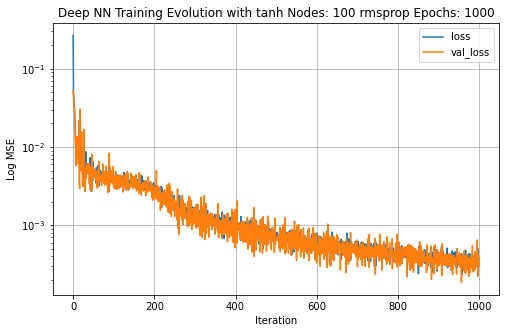

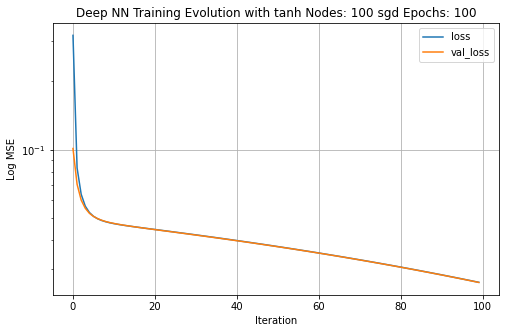

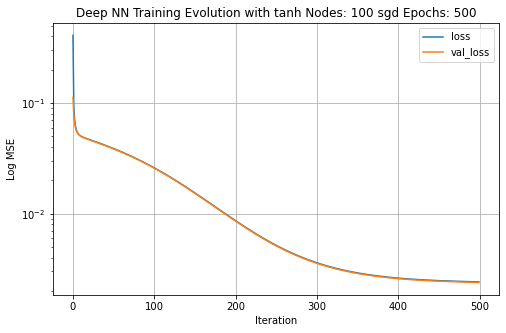

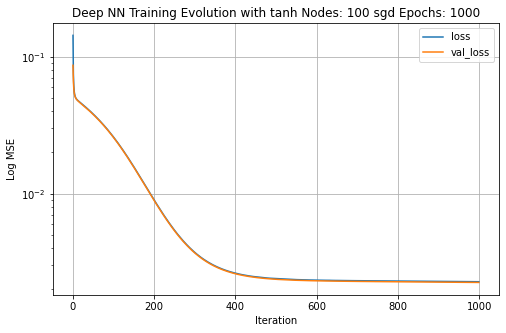

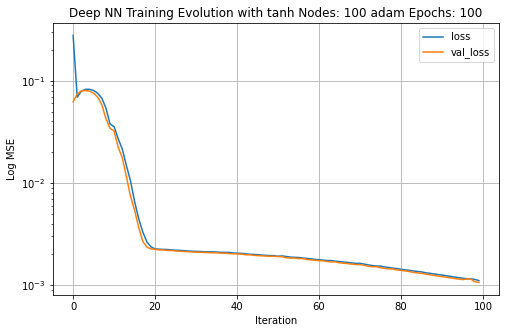

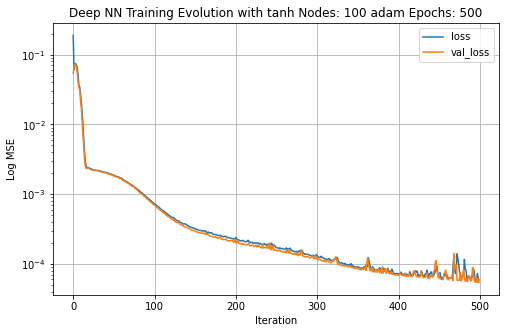

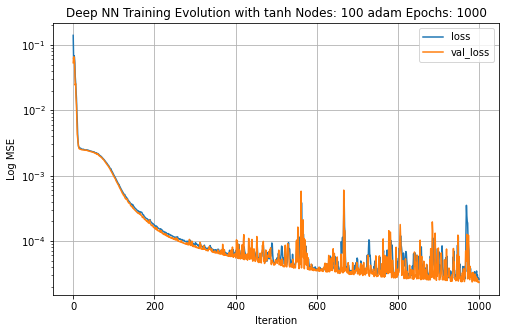

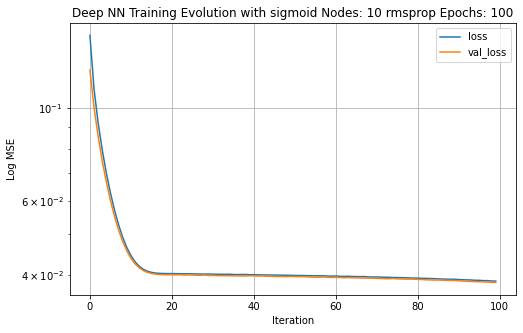

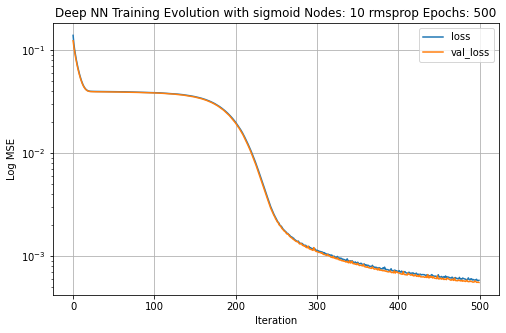

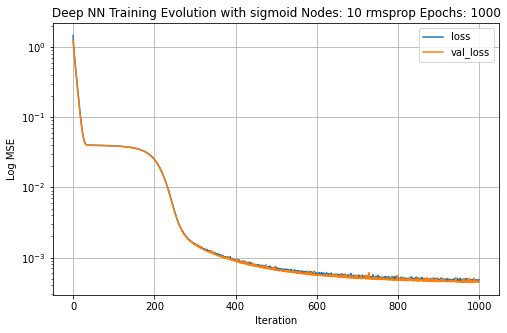

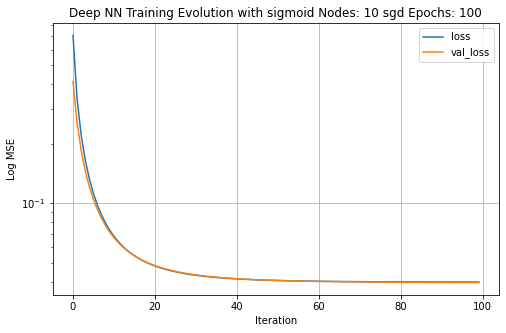

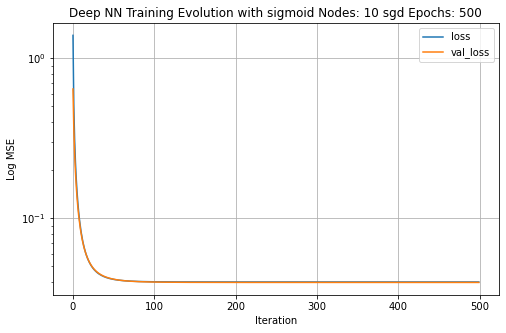

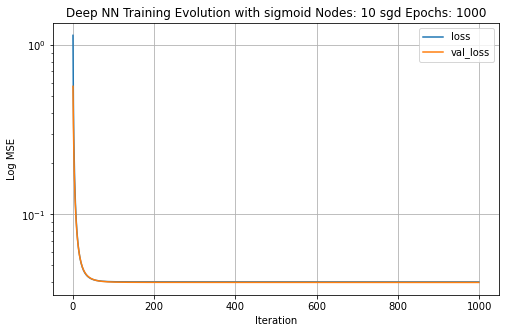

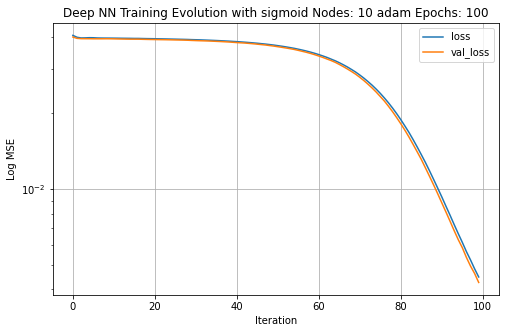

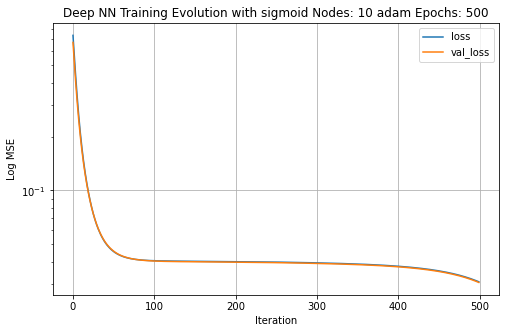

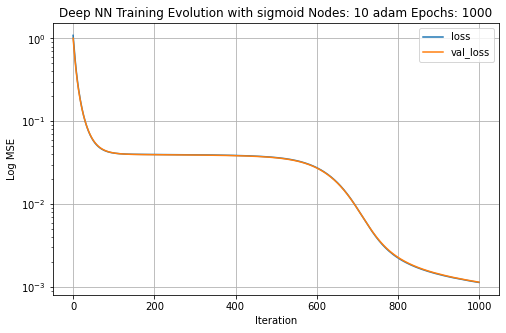

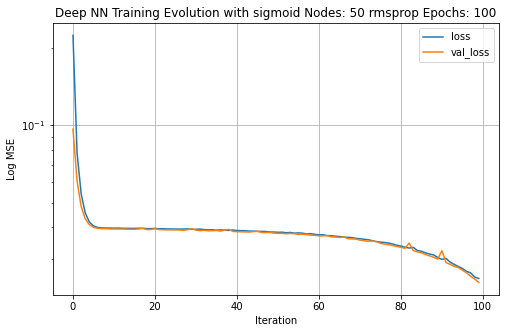

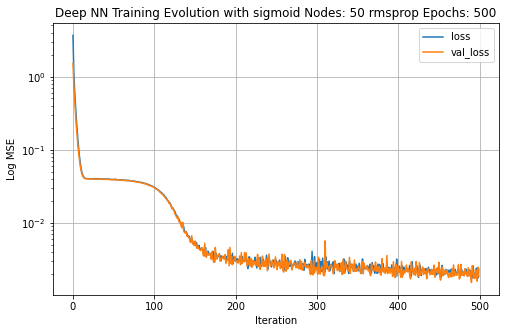

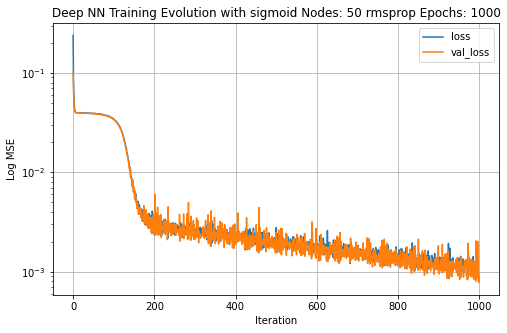

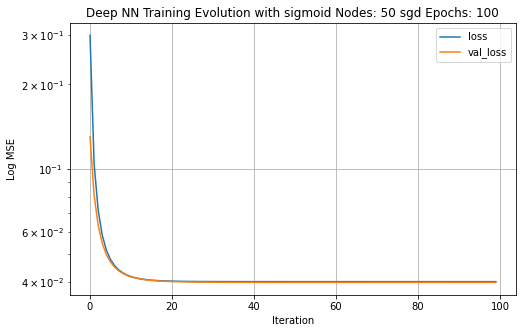

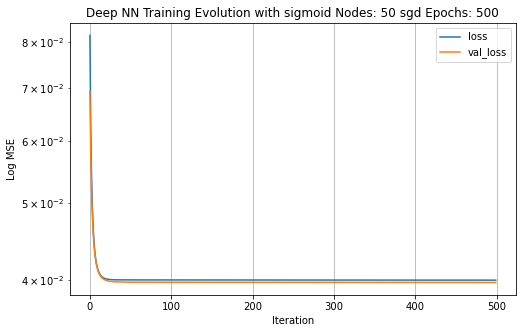

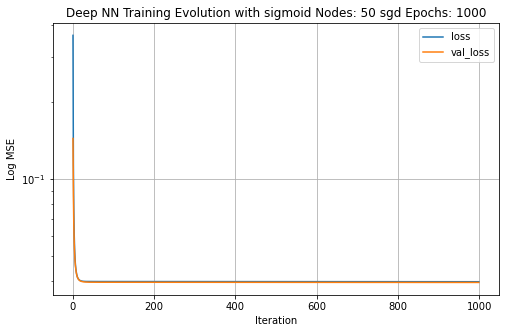

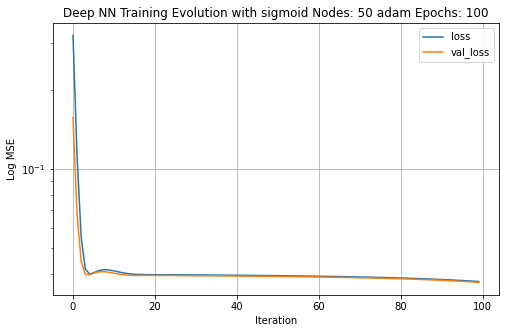

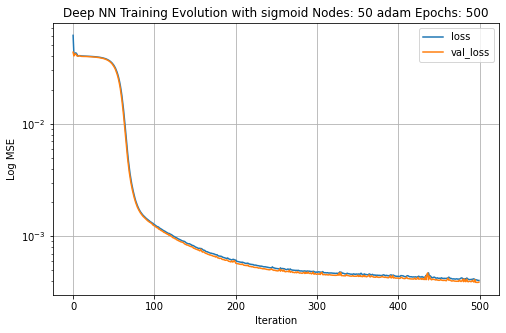

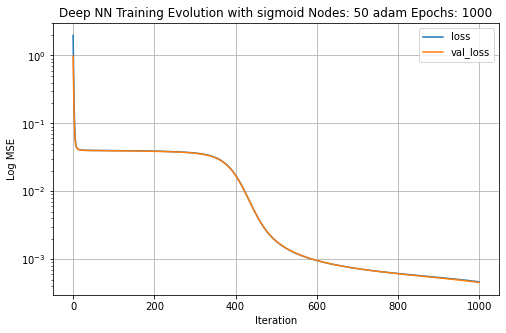

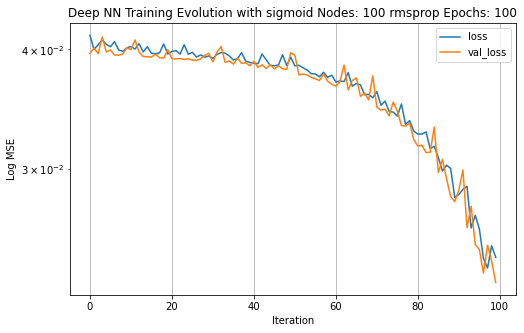

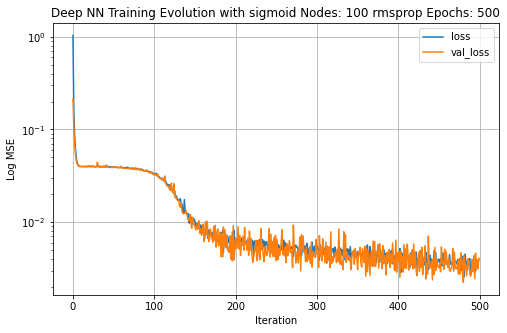

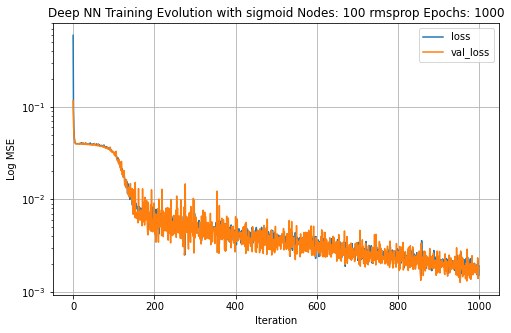

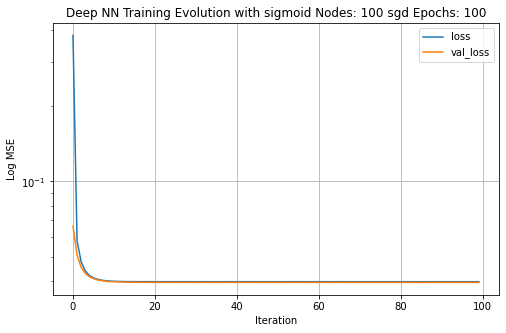

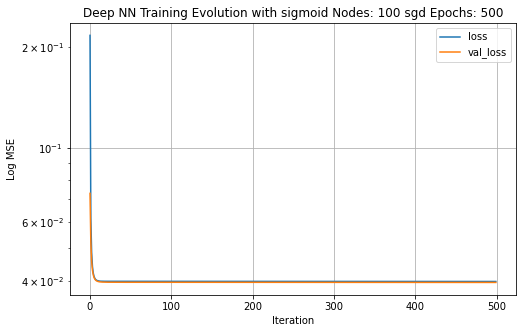

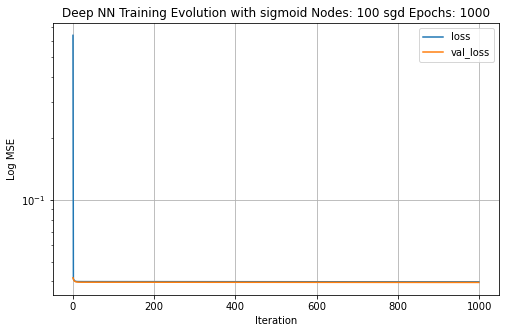

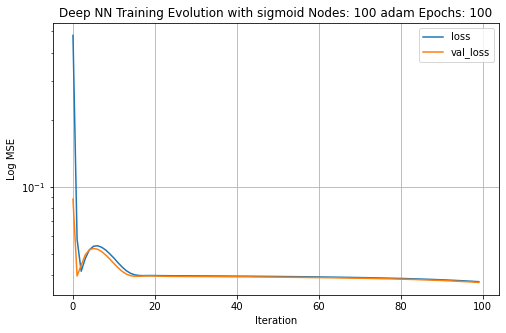

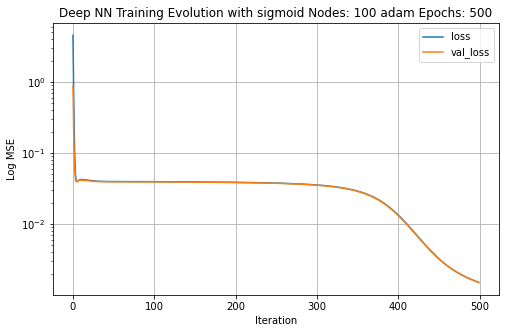

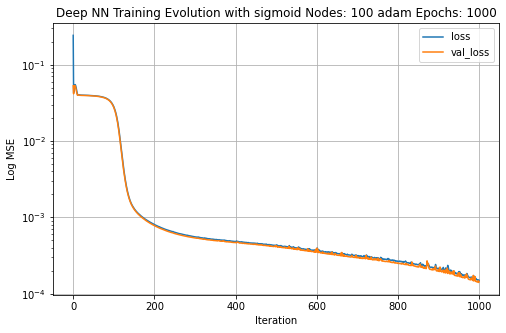

In [ ]:
dnn_models = {}

for activation in activations:
  for node in nodes:
    for optimizer in optimizers:
      for epoch in epochs:
        dnn_models['DNN' + ' ' + activation + '  Nodes: ' + str(node) + ' ' + optimizer + ' Epochs: ' + str(epoch)] = dnn_runner(activation, node, optimizer, epoch)

### Ten-layer Neural Networks

In [ ]:
activations = ['relu', 'tanh', 'sigmoid']
nodes = [10, 50, 100]
optimizers = ['rmsprop', 'sgd', 'adam']
epochs = [100, 500, 1000]

In [ ]:
def tenlayer_nn_runner(activation:str, nodes: int, optimizer: str, epochs:int):
  np.random.seed(0)
  # initialize the mode as Sequential class - the next steps we will add layers to it
  model3 = Sequential()

  # add the first layer
  model3.add(Dense(nodes, activation=activation, input_dim=X_train.shape[1]))
  # add the second layer
  model3.add(Dense(nodes, activation=activation))
  # add the third layer
  model3.add(Dense(nodes, activation=activation))
  # add the fourth layer
  model3.add(Dense(nodes, activation=activation))
  # add the fifth layer
  model3.add(Dense(nodes, activation=activation))
  # add the sixth layer
  model3.add(Dense(nodes, activation=activation))
  # add the seventh layer
  model3.add(Dense(nodes, activation=activation))
  # add the eighth layer
  model3.add(Dense(nodes, activation=activation))
  # add the ninth layer
  model3.add(Dense(nodes, activation=activation))
  # add the tenth layer
  model3.add(Dense(nodes, activation=activation))
  # output layer is the same as the single NN
  model3.add(Dense(1))
  # we will use our customized activation function
  model3.add(Activation(custom_activation))
  # compile the model
  model3.compile(loss='mse', optimizer=optimizer)

  history = model3.fit(X_train, y_train, batch_size=512, epochs=epochs, validation_split=0.1, verbose=0,
                            validation_data=(X_test, y_test))

  # print the model parameters
  #print(model.summary())

  convergence=history.history
  # plot the model learning history
  pd.DataFrame(history.history).plot(figsize=(8,5), logy=True)
  plt.title('Ten-Layer NN Training Evolution with ' + activation + ' Nodes: ' + str(nodes) + ' ' + optimizer + '  Epochs: ' + str(epochs))
  plt.ylabel('Log MSE')
  plt.xlabel('Iteration')
  plt.grid(True)

  return model3, convergence

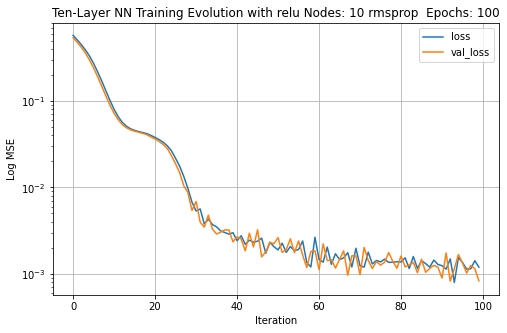

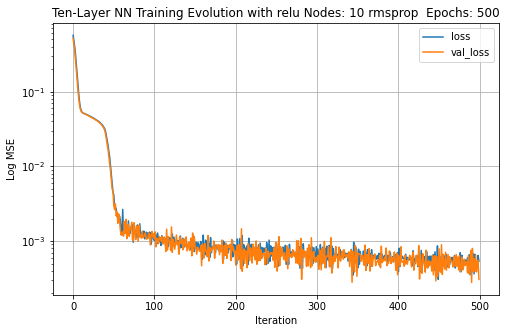

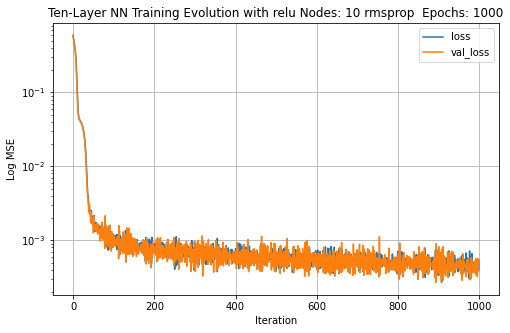

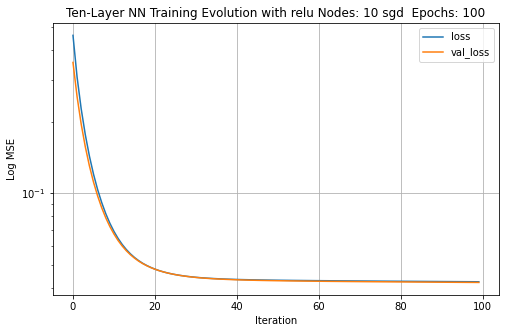

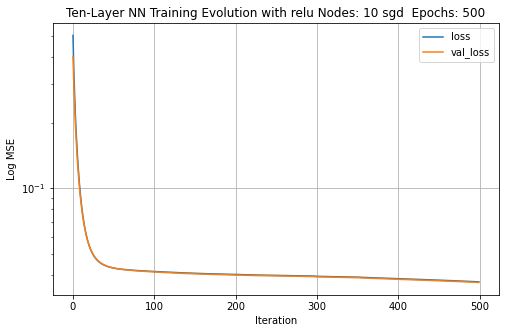

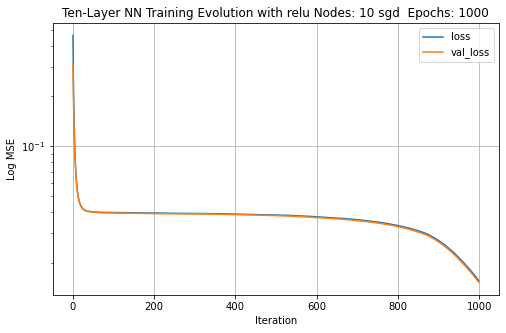

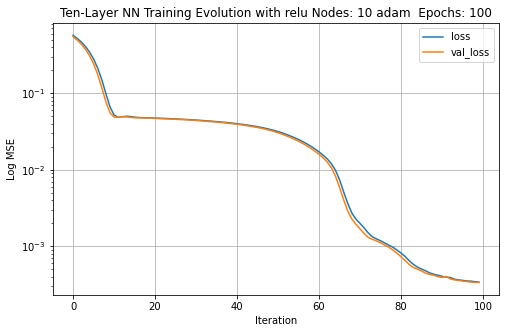

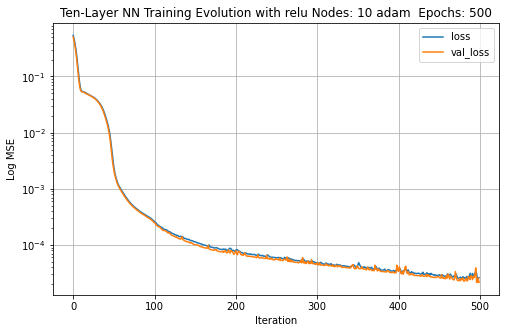

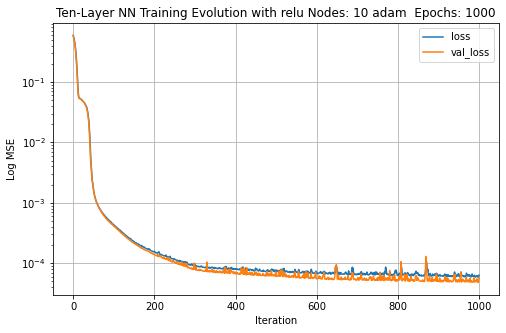

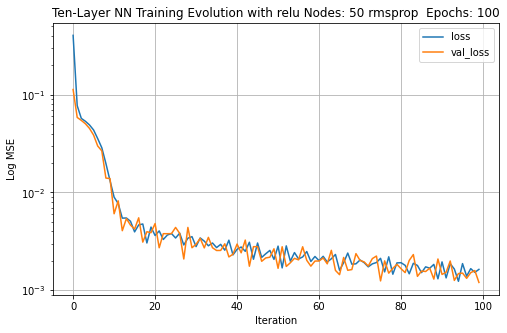

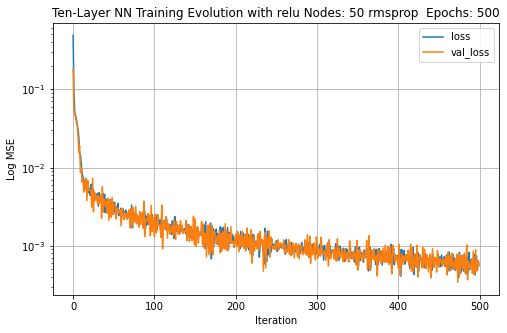

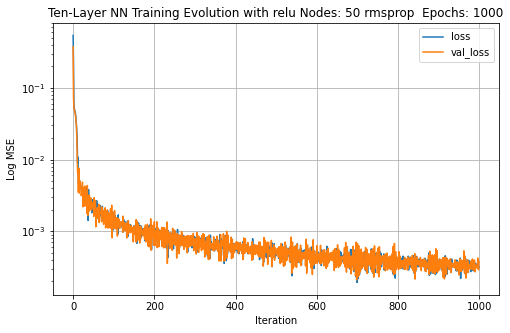

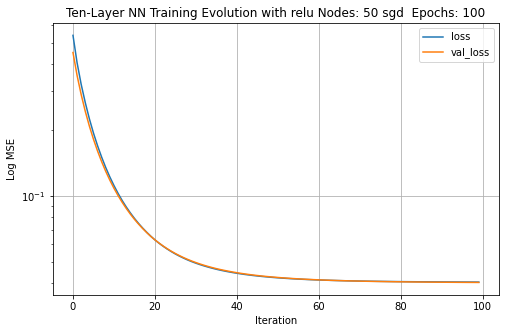

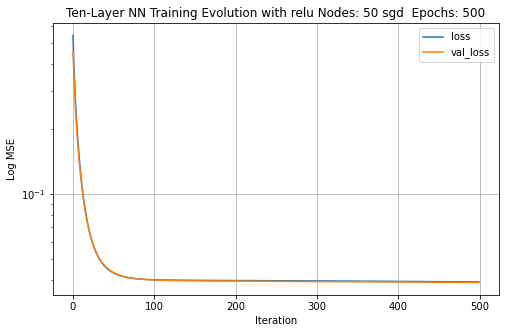

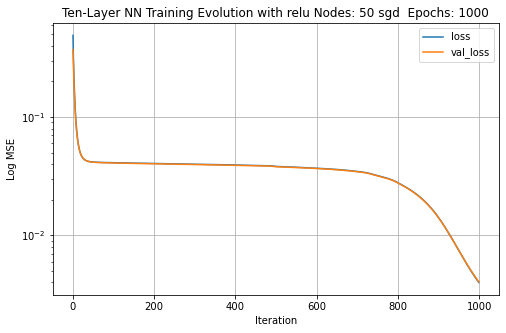

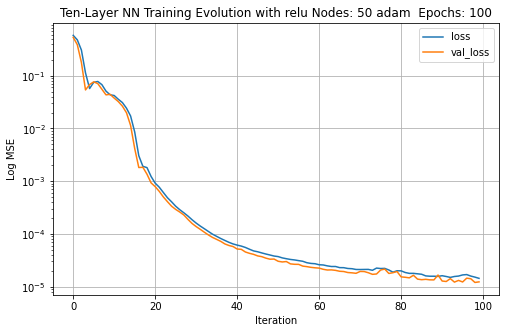

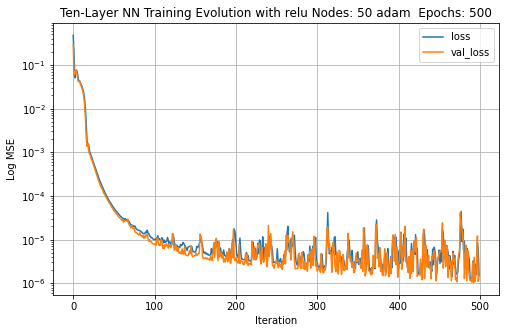

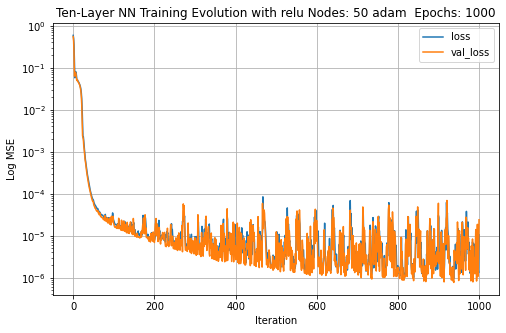

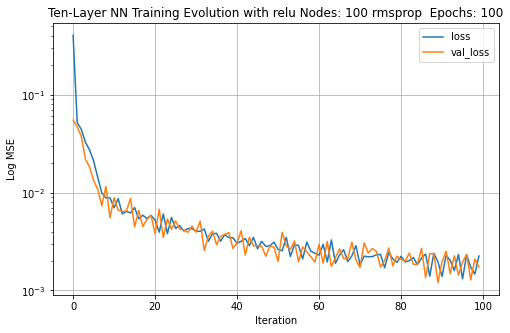

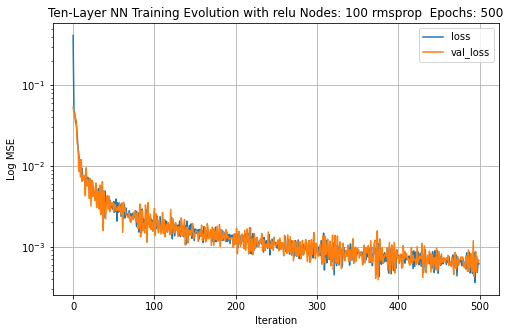

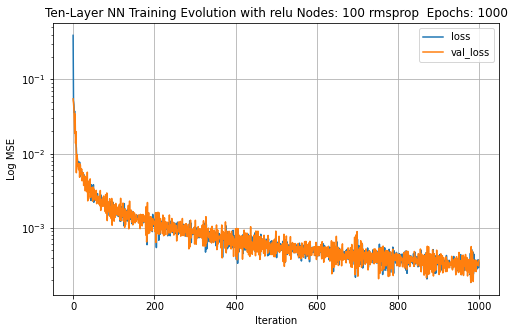

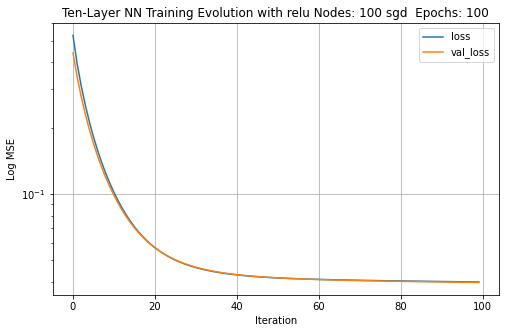

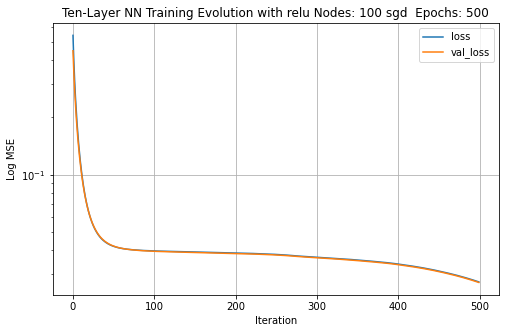

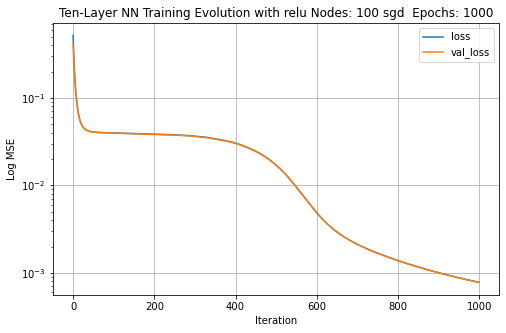

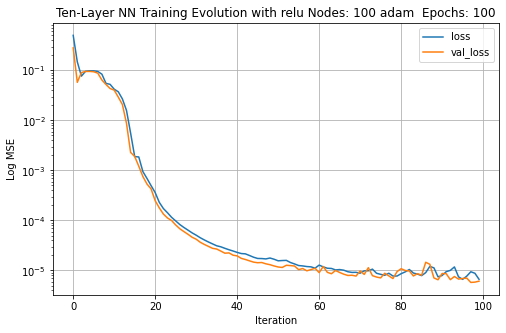

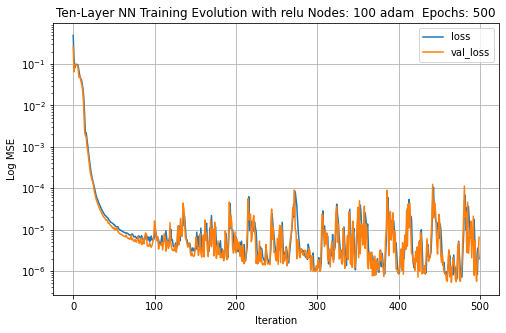

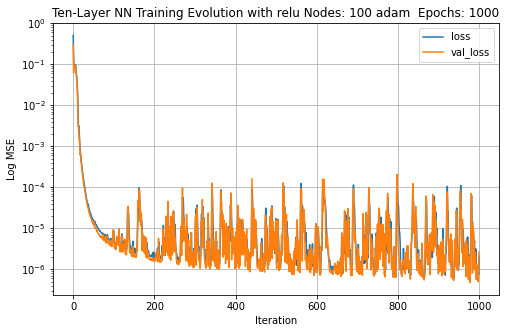

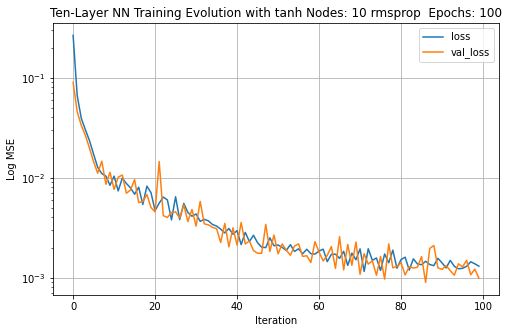

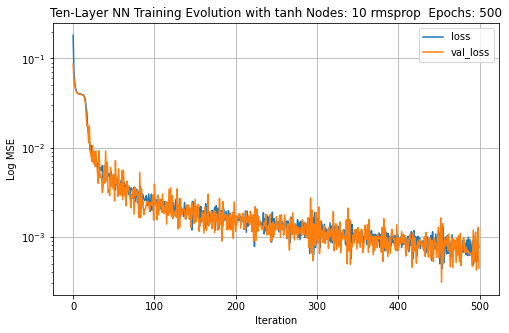

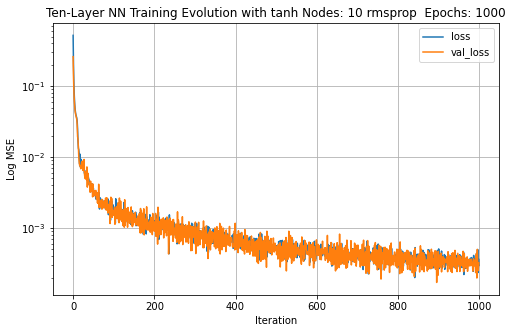

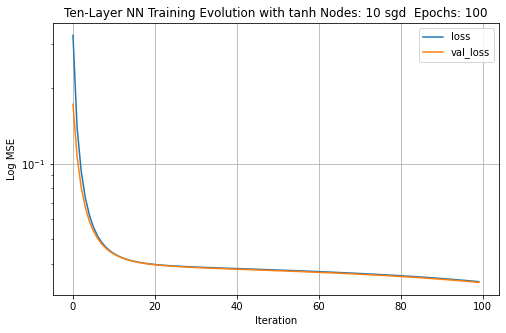

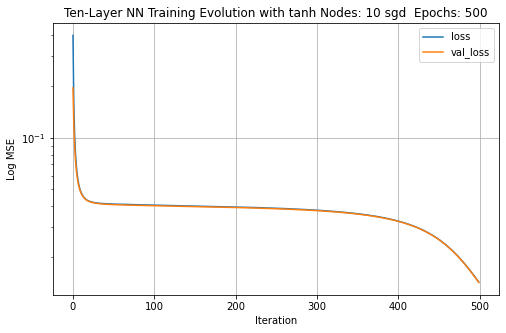

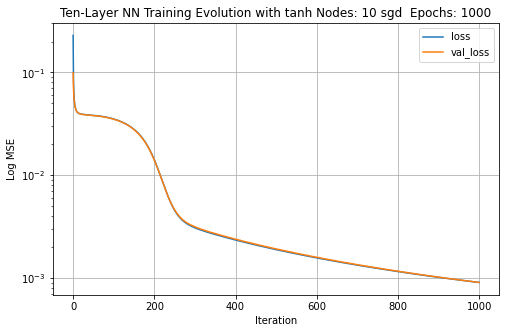

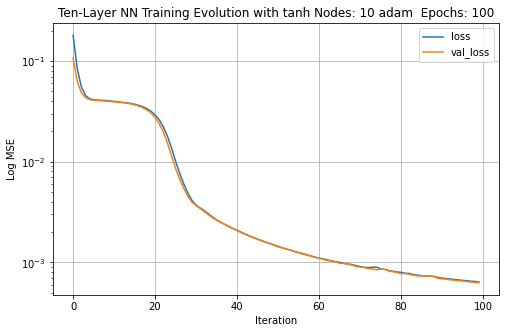

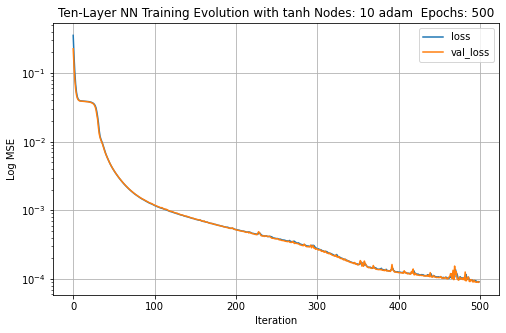

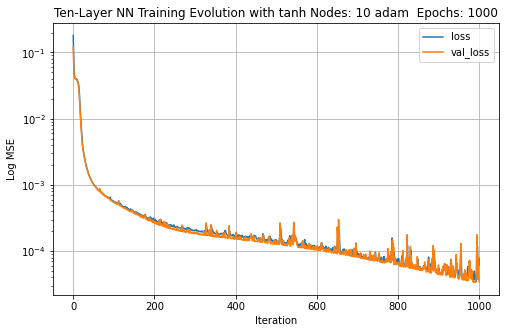

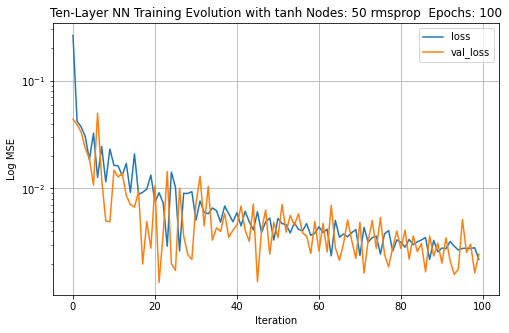

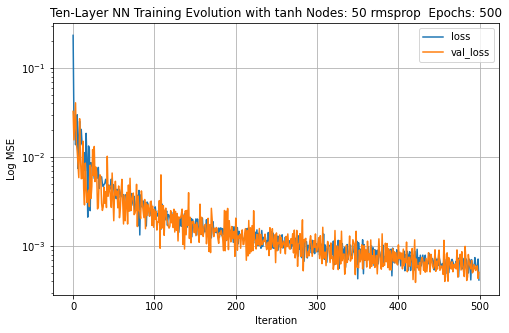

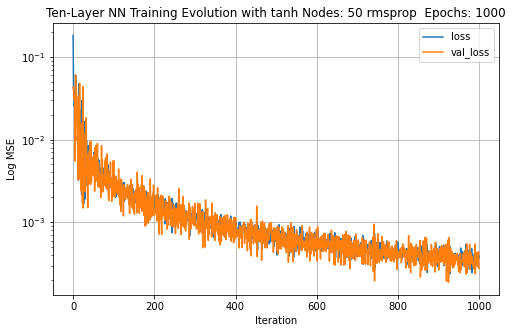

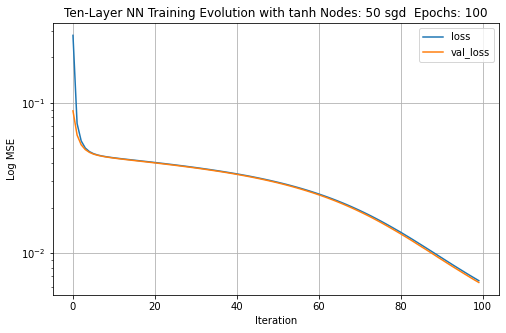

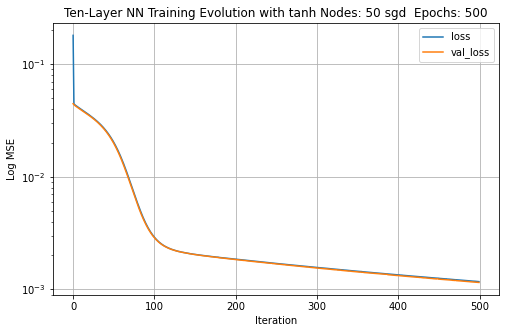

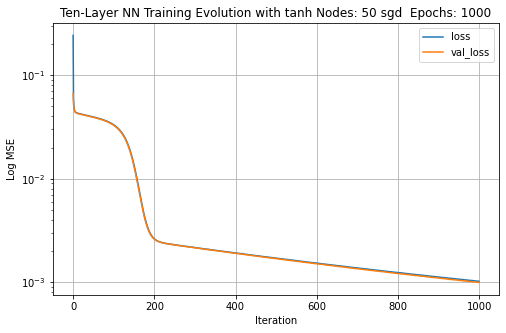

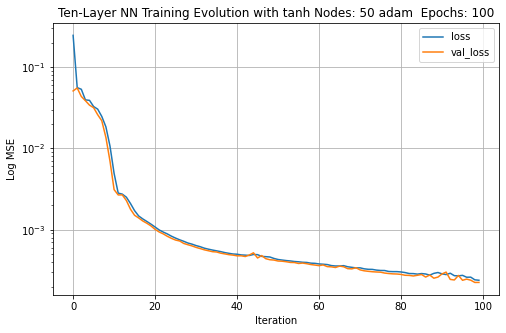

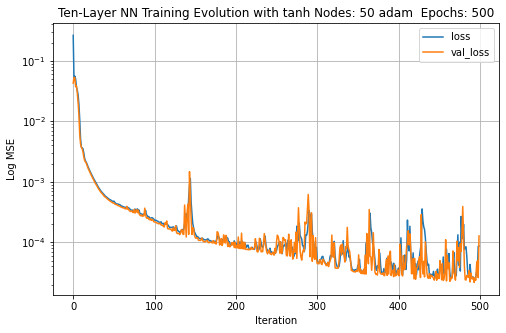

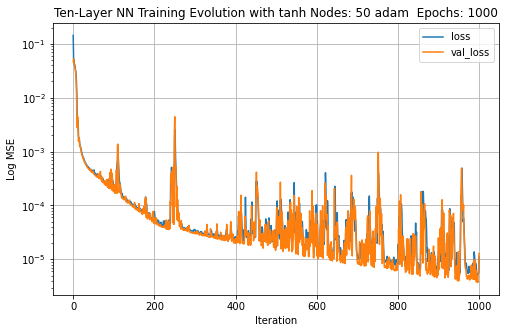

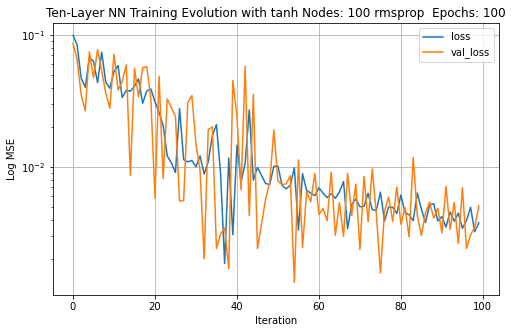

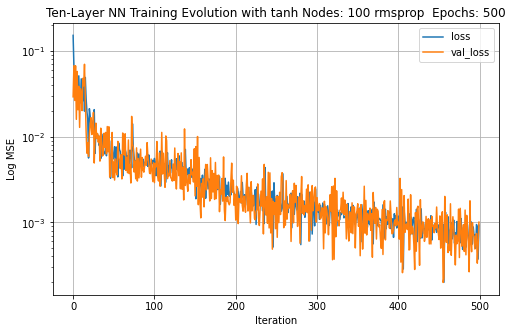

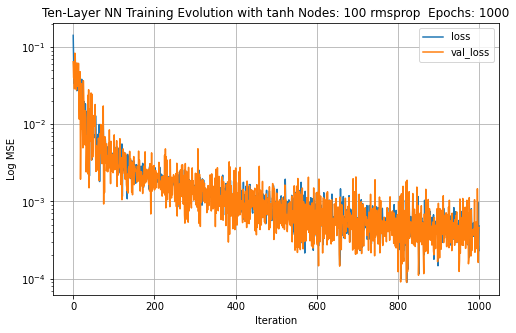

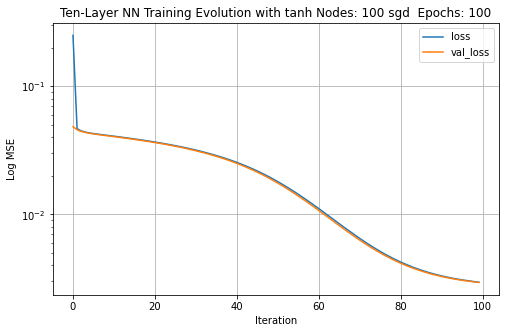

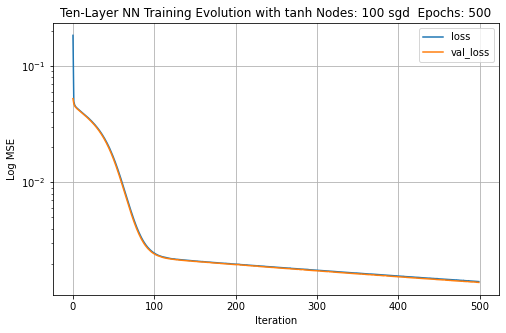

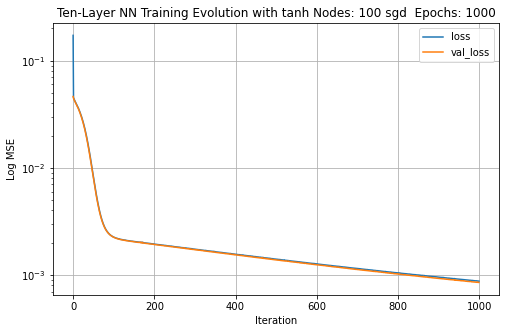

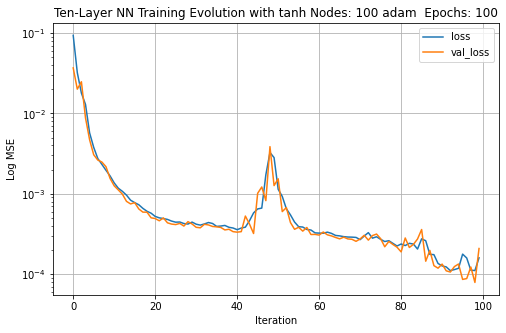

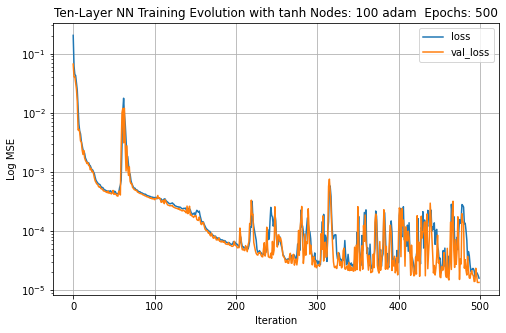

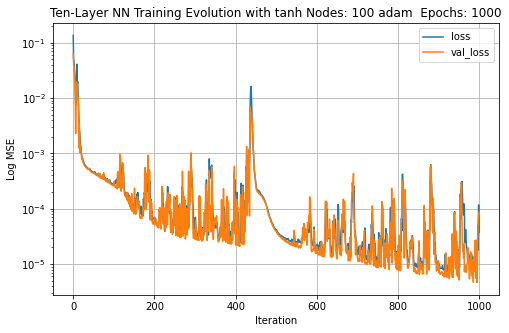

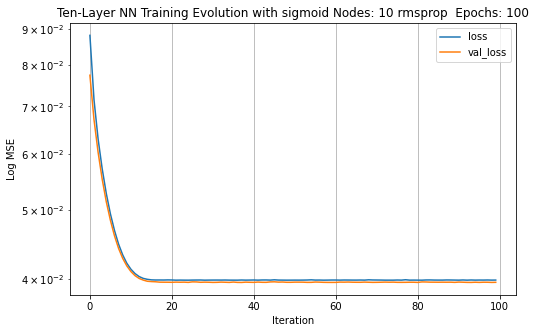

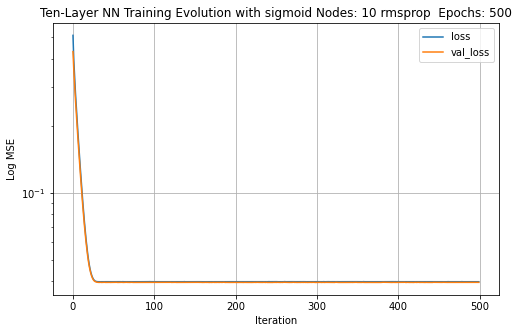

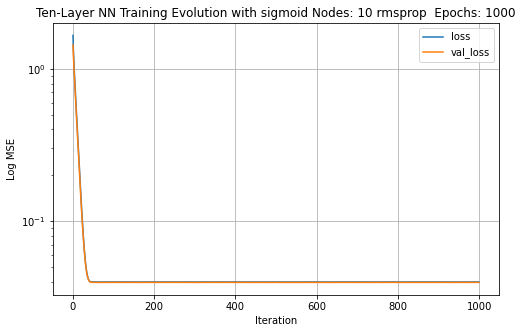

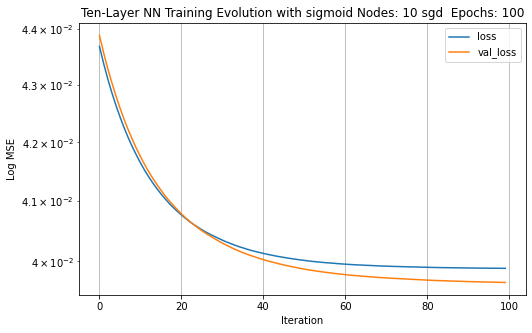

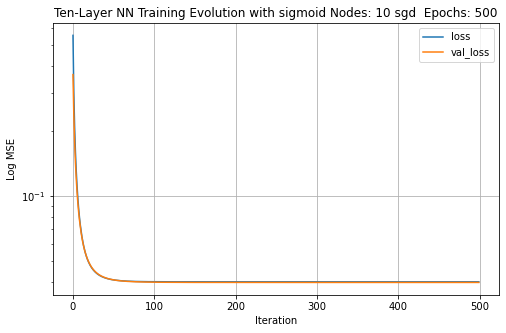

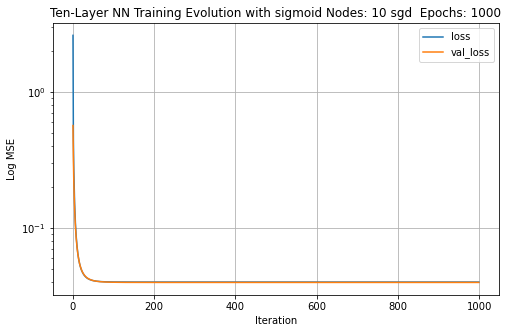

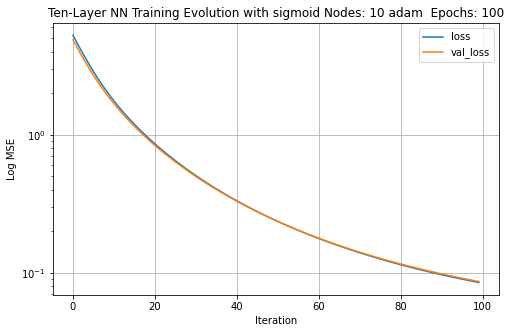

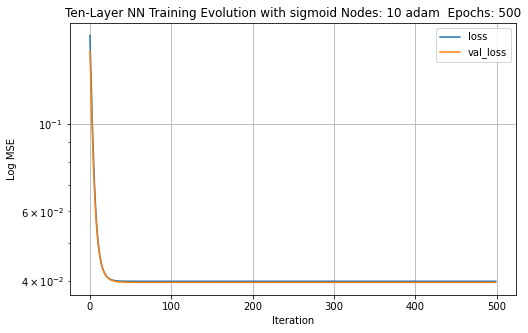

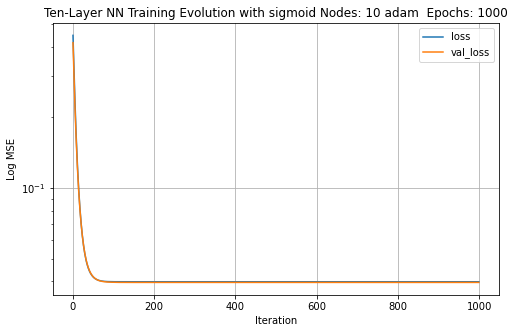

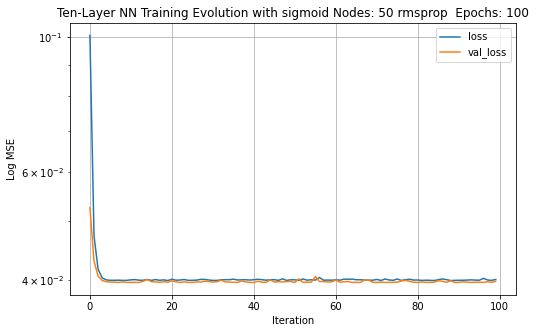

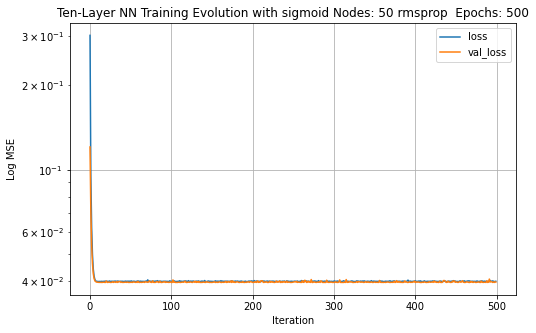

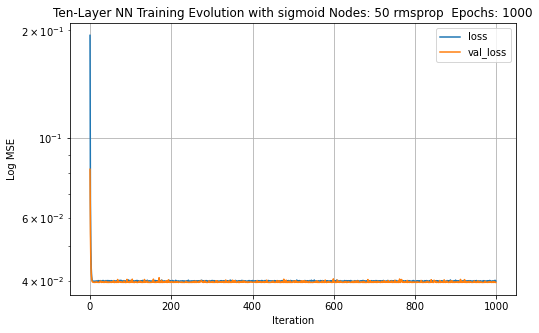

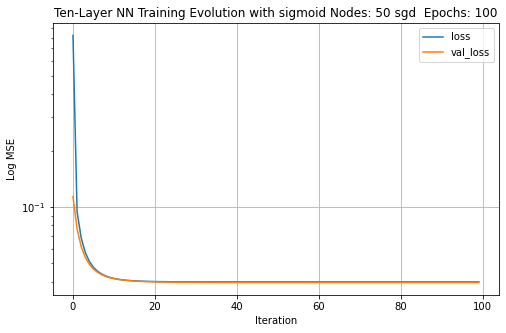

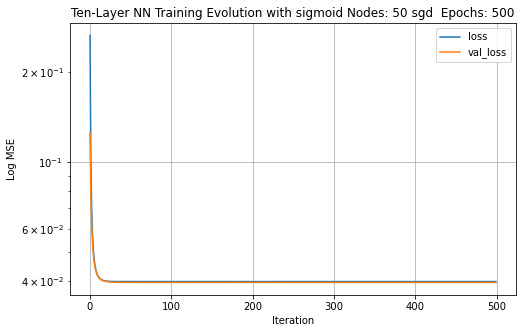

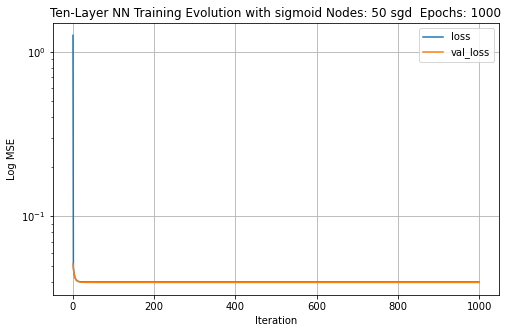

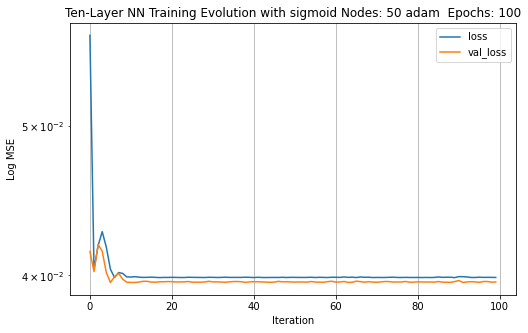

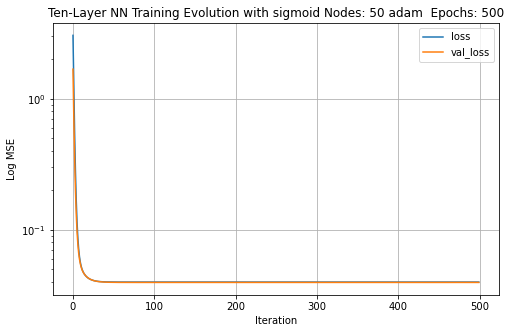

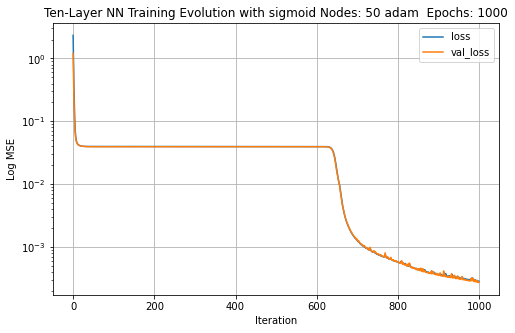

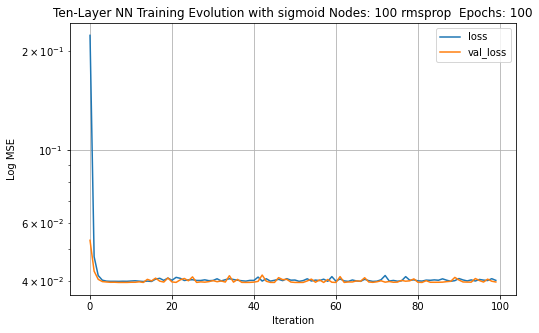

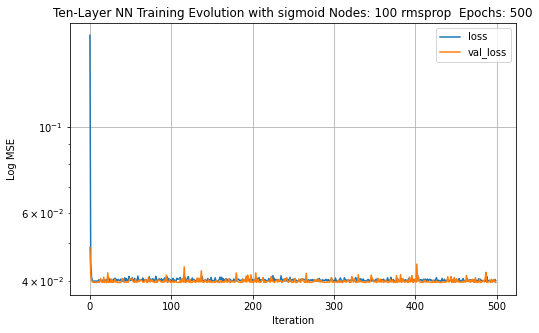

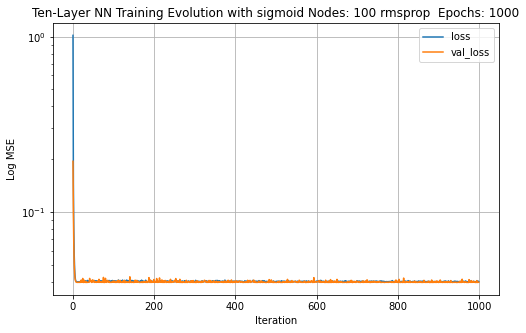

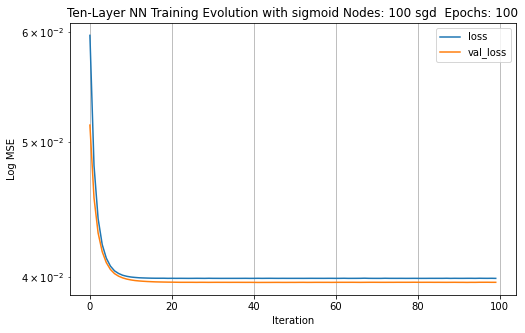

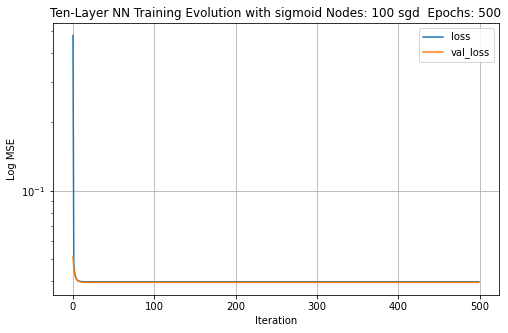

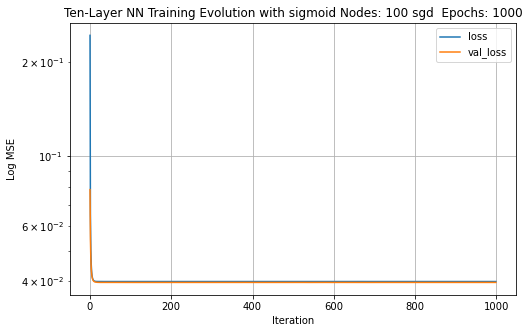

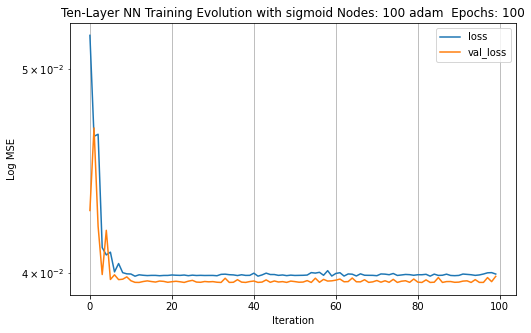

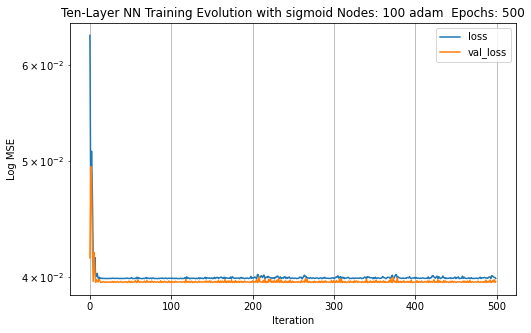

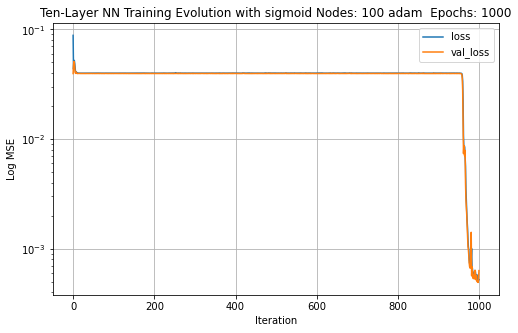

In [ ]:
tenlayer_nn_models = {}

for activation in activations:
  for node in nodes:
    for optimizer in optimizers:
      for epoch in epochs:
        tenlayer_nn_models['TENLAYER NN' + ' Nodes: ' + activation + ' ' + str(node) + ' ' + optimizer + ' Epochs:  ' + str(epoch)] = tenlayer_nn_runner(activation, node, optimizer, epoch)

## Part B: Choose the Best Model

In [ ]:
def CheckAccuracy(model_spec:str, y, y_hat, plot_data):
    stats = dict()

    stats['diff'] = y - y_hat

    stats['mse'] = np.mean(stats['diff'] ** 2)

    stats['rmse'] = np.sqrt(stats['mse'])

    stats['mae'] = np.mean(abs(stats['diff']))

    stats['mpe'] = np.sqrt(stats['mse']) / np.mean(y)

    df = pd.DataFrame(index = [model_spec], columns=['mse', 'rmse','mae', 'mpe', 'convergence'])
    df.loc[model_spec]['mse'] = stats['mse']
    df.loc[model_spec]['rmse'] = stats['rmse']
    df.loc[model_spec]['mae'] = stats['mae']
    df.loc[model_spec]['mpe'] = stats['mpe']
    df.loc[model_spec]['convergence'] = plot_data

    return df

In [ ]:
# cumulating all single (One-layer) Neutral Network Performance into dataframe
SNN_df = pd.DataFrame()

count = 0
for model in snn_models.keys():
  y_test_hat = snn_models[model][0].predict(X_test, verbose = 0)
  y_test_hat = np.squeeze(y_test_hat)

  temp_df = CheckAccuracy(model, y_test, y_test_hat, snn_models[model][1])
  SNN_df = pd.concat([SNN_df, temp_df])
  count = count + 1

# SNN_df.sort_values(by=['mse'], ascending=True)

In [ ]:
# cumulating all Deep (Three-layer) Neutral Network Performance into dataframe

DNN_df = pd.DataFrame()

count = 0
for model in dnn_models.keys():
  y_test_hat = dnn_models[model][0].predict(X_test, verbose = 0)
  y_test_hat = np.squeeze(y_test_hat)

  temp_df = CheckAccuracy(model, y_test, y_test_hat, dnn_models[model][1])
  DNN_df = pd.concat([DNN_df, temp_df])
  count = count + 1

# pd.set_option('display.max_rows', None)
# DNN_df.sort_values(by=['mse'], ascending=True)

In [ ]:
# cumulating all Extra Deep (Ten-layer) Neutral Network Performance into dataframe

TENLAYER_NN_df = pd.DataFrame()

count = 0
for model in tenlayer_nn_models.keys():
  y_test_hat = tenlayer_nn_models[model][0].predict(X_test, verbose = 0)
  y_test_hat = np.squeeze(y_test_hat)

  temp_df = CheckAccuracy(model, y_test, y_test_hat, tenlayer_nn_models[model][1])
  TENLAYER_NN_df = pd.concat([TENLAYER_NN_df, temp_df])
  count = count + 1

# pd.set_option('display.max_rows', None)
# TENLAYER_NN_df.sort_values(by=['mse'], ascending=True)

Performance of all Neutral Network

In [ ]:
all_model_df = pd.concat([SNN_df, DNN_df, TENLAYER_NN_df])
all_model_df.sort_values(by=['mse'], ascending=True)

mse      rmse  \
TENLAYER NN Nodes: relu 50 adam Epochs:  500        0.000002  0.001354   
DNN relu  Nodes: 100 adam Epochs: 1000              0.000003  0.001619   
TENLAYER NN Nodes: relu 100 adam Epochs:  1000      0.000003  0.001645   
DNN relu  Nodes: 50 adam Epochs: 1000               0.000007  0.002563   
TENLAYER NN Nodes: relu 100 adam Epochs:  500       0.000007  0.002609   
TENLAYER NN Nodes: relu 100 adam Epochs:  100       0.000007  0.002695   
DNN relu  Nodes: 100 adam Epochs: 500               0.000007  0.002708   
DNN relu  Nodes: 50 adam Epochs: 500                0.000009  0.003069   
SNN relu Nodes: 300 adam Epochs: 1000               0.000011  0.003369   
SNN relu Nodes: 300 rmsprop Epochs: 1000            0.000013  0.003594   
SNN relu Nodes: 300 adam Epochs: 500                0.000013  0.003631   
TENLAYER NN Nodes: relu 50 adam Epochs:  100        0.000014  0.003726   
TENLAYER NN Nodes: tanh 50 adam Epochs:  1000       0.000014  0.003748   
TENLAYER NN Nodes: tanh 100 adam Epochs:  500       0.000016     0.004   
TENLAYER NN Nodes: relu 50 adam Epochs:  1000       0.000024  0.004926   
TENLAYER NN Nodes: relu 10 adam Epochs:  500        0.000025  0.004975   
DNN tanh  Nodes: 100 adam Epochs: 1000              0.000027   0.00521   
DNN relu  Nodes: 100 adam Epochs: 100                0.00003  0.005435   
TENLAYER NN Nodes: tanh 10 adam Epochs:  1000       0.000032   0.00567   
DNN tanh  Nodes: 50 adam Epochs: 1000               0.000035  0.005938   
SNN sigmoid Nodes: 300 adam Epochs: 1000            0.000046  0.006793   
SNN tanh Nodes: 300 adam Epochs: 1000               0.000049   0.00698   
DNN tanh  Nodes: 100 adam Epochs: 500               0.000057  0.007557   
TENLAYER NN Nodes: relu 10 adam Epochs:  1000       0.000063  0.007946   
SNN relu Nodes: 300 rmsprop Epochs: 500             0.000074  0.008613   
DNN relu  Nodes: 10 adam Epochs: 1000               0.000075  0.008647   
TENLAYER NN Nodes: tanh 100 adam Epochs:  1000      0.000088  0.009389   
TENLAYER NN Nodes: tanh 10 adam Epochs:  500         0.00009  0.009487   
SNN relu Nodes: 300 adam Epochs: 100                0.000093   0.00965   
DNN relu  Nodes: 10 adam Epochs: 500                0.000098  0.009876   
DNN tanh  Nodes: 50 adam Epochs: 500                0.000116   0.01076   
DNN relu  Nodes: 50 rmsprop Epochs: 1000            0.000125  0.011192   
DNN relu  Nodes: 100 rmsprop Epochs: 1000           0.000128  0.011313   
TENLAYER NN Nodes: tanh 50 adam Epochs:  500        0.000129  0.011376   
SNN tanh Nodes: 300 adam Epochs: 500                 0.00013  0.011398   
DNN relu  Nodes: 50 adam Epochs: 100                0.000137  0.011708   
SNN relu Nodes: 300 rmsprop Epochs: 100             0.000139  0.011787   
DNN relu  Nodes: 10 rmsprop Epochs: 1000            0.000143  0.011948   
DNN sigmoid  Nodes: 100 adam Epochs: 1000           0.000171   0.01308   
TENLAYER NN Nodes: tanh 100 adam Epochs:  100       0.000206  0.014367   
DNN relu  Nodes: 100 rmsprop Epochs: 500            0.000236  0.015374   
DNN tanh  Nodes: 10 adam Epochs: 1000               0.000238  0.015436   
TENLAYER NN Nodes: tanh 50 rmsprop Epochs:  1000    0.000266  0.016315   
TENLAYER NN Nodes: tanh 50 adam Epochs:  100         0.00027  0.016436   
DNN tanh  Nodes: 10 rmsprop Epochs: 1000            0.000286  0.016904   
DNN tanh  Nodes: 100 rmsprop Epochs: 1000           0.000293  0.017128   
TENLAYER NN Nodes: sigmoid 50 adam Epochs:  1000    0.000316  0.017779   
SNN tanh Nodes: 300 rmsprop Epochs: 1000            0.000325  0.018039   
DNN relu  Nodes: 50 rmsprop Epochs: 500             0.000341   0.01847   
TENLAYER NN Nodes: tanh 10 rmsprop Epochs:  1000    0.000346  0.018599   
TENLAYER NN Nodes: relu 10 rmsprop Epochs:  500     0.000358  0.018916   
DNN relu  Nodes: 10 rmsprop Epochs: 500             0.000364  0.019089   
TENLAYER NN Nodes: relu 100 rmsprop Epochs:  1000   0.000377  0.019412   
TENLAYER NN Nodes: relu 10 adam Epochs:  100        0.000388 

Identifying Top 10 Model

In [ ]:
def find_min_view_convergence(nn_df, models_dict, pick: int):
  ascending_df = nn_df.sort_values(by=['mse'], ascending=True).head(pick)
  for model_name in ascending_df.index:
    convergence = nn_df.loc[model_name]['convergence']

    # print the model parameters
    #print(models_dict[model_name][0].summary())

    # plot the model learning history
    pd.DataFrame(convergence).plot(figsize=(8,5), logy=True)
    plt.title(model_name)
    plt.ylabel('Log MSE')
    plt.xlabel('Iteration')
    plt.grid(True)

  return ascending_df

mse      rmse       mae  \
TENLAYER NN Nodes: relu 50 adam Epochs:  500    0.000002  0.001354  0.000977   
DNN relu  Nodes: 100 adam Epochs: 1000          0.000003  0.001619  0.001189   
TENLAYER NN Nodes: relu 100 adam Epochs:  1000  0.000003  0.001645  0.001421   
DNN relu  Nodes: 50 adam Epochs: 1000           0.000007  0.002563   0.00167   
TENLAYER NN Nodes: relu 100 adam Epochs:  500   0.000007  0.002609  0.002328   
TENLAYER NN Nodes: relu 100 adam Epochs:  100   0.000007  0.002695  0.001983   
DNN relu  Nodes: 100 adam Epochs: 500           0.000007  0.002708  0.001582   
DNN relu  Nodes: 50 adam Epochs: 500            0.000009  0.003069  0.001825   
SNN relu Nodes: 300 adam Epochs: 1000           0.000011  0.003369   0.00266   
SNN relu Nodes: 300 rmsprop Epochs: 1000        0.000013  0.003594  0.002206   

                                                     mpe  \
TENLAYER NN Nodes: relu 50 adam Epochs:  500    0.005458   
DNN relu  Nodes: 100 adam Epochs: 1000          0.006526   
TENLAYER NN Nodes: relu 100 adam Epochs:  1000  0.006628   
DNN relu  Nodes: 50 adam Epochs: 1000            0.01033   
TENLAYER NN Nodes: relu 100 adam Epochs:  500   0.010515   
TENLAYER NN Nodes: relu 100 adam Epochs:  100   0.010862   
DNN relu  Nodes: 100 adam Epochs: 500           0.010912   
DNN relu  Nodes: 50 adam Epochs: 500            0.012368   
SNN relu Nodes: 300 adam Epochs: 1000           0.013578   
SNN relu Nodes: 300 rmsprop Epochs: 1000        0.014482   

                                                                                      convergence  
TENLAYER NN Nodes: relu 50 adam Epochs:  500    {'loss': [0.4728619456291199, 0.18168380856513...  
DNN relu  Nodes: 100 adam Epochs: 1000          {'loss': [0.5519480109214783, 0.16432283818721...  
TENLAYER NN Nodes: relu 100 adam Epochs:  1000  {'loss': [0.5091086030006409, 0.16355977952480...  
DNN relu  Nodes: 50 adam Epochs: 1000           {'loss': [0.46903809905052185, 0.2491972297430...  
TENLAYER NN Nodes: relu 100 adam Epochs:  500   {'loss': [0.4937456250190735, 0.13519415259361...  
TENLAYER NN Nodes: relu 100 adam Epochs:  100   {'loss': [0.5017431378364563, 0.14840234816074...  
DNN relu  Nodes: 100 adam Epochs: 500           {'loss': [0.702933669090271, 0.261994868516922...  
DNN relu  Nodes: 50 adam Epochs: 500            {'loss': [0.3615974187850952, 0.18334031105041...  
SNN relu Nodes: 300 adam Epochs: 1000           {'loss': [0.11802108585834503, 0.0528391264379...  
SNN relu Nodes: 300 rmsprop Epochs: 1000        {'loss': [0.0987773910164833, 0.04106929898262...

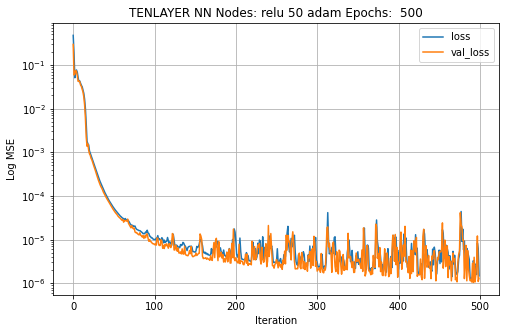

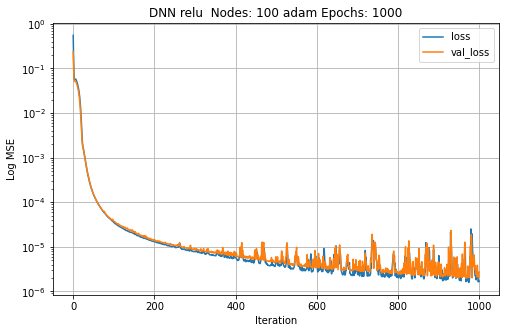

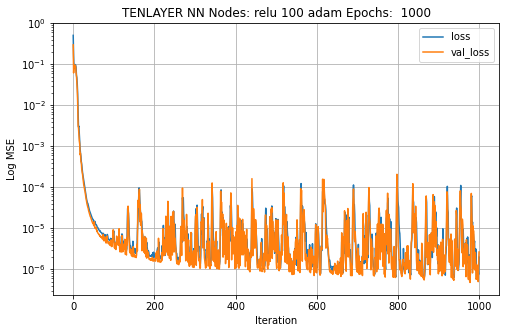

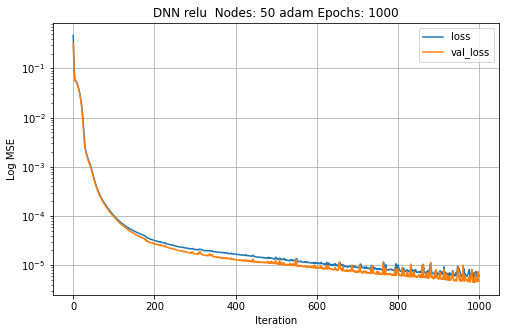

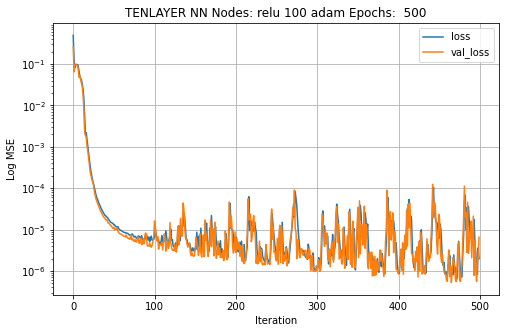

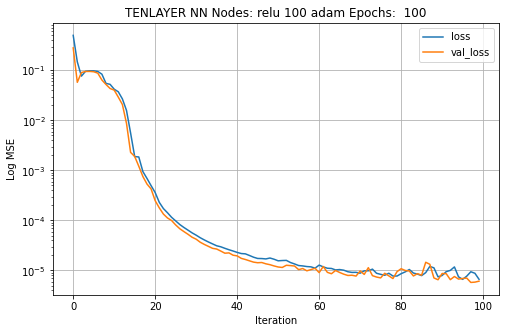

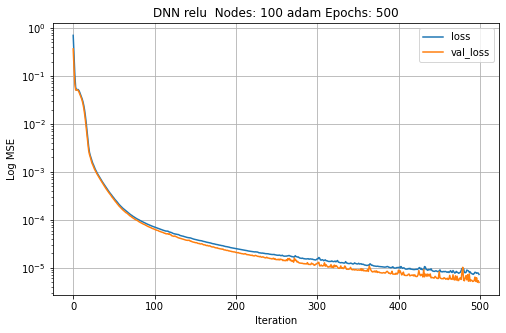

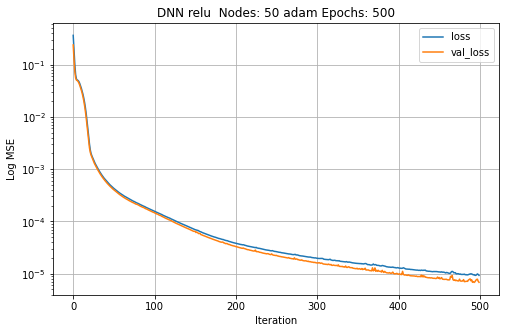

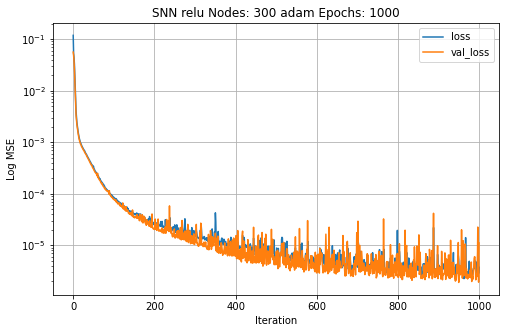

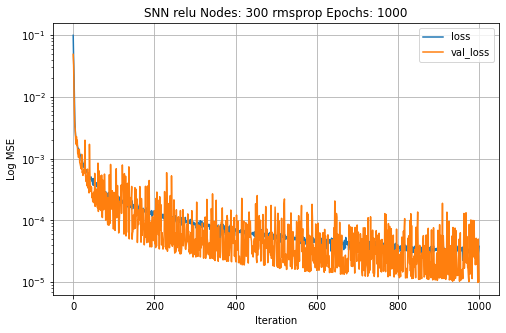

In [ ]:
find_min_view_convergence(all_model_df, snn_models, 10)  # obtain top 5 model in SNN

## Part C: Validating Best Model With Shuffled Dataset

Shuffling Dataset

In [ ]:
from sklearn.utils import shuffle
# random shuffle dataframe

df2 = df.sample(frac=1, random_state=0).reset_index(drop=True)

# split data into training and testing sets
n = 3000
n_train =  (int)(0.8 * n)

# select training set and define independent and dependent variable (call price)
train = df2[0:n_train]
X_train = train[['Stock Price', 'Maturity', 'Dividends', 'Volatility', 'Risk-free']].values
y_train = train['Call Price'].values

# select testing set and define independent and dependent variable (call price)
test = df2[n_train+1:n]
X_test = test[['Stock Price', 'Maturity', 'Dividends', 'Volatility', 'Risk-free']].values
y_test = test['Call Price'].values

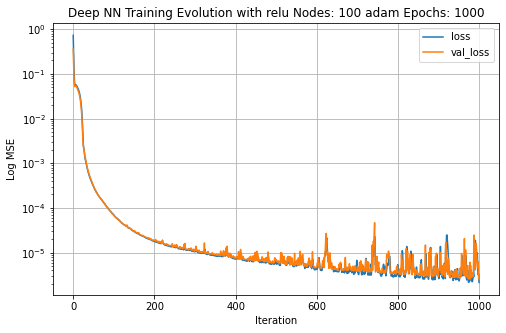

In [ ]:
# re-train best model with randomized training set and validation set
best_model = dnn_runner('relu', 100, 'adam', 1000)

In [ ]:
from IPython.display import display

def CheckAccuracy(model_spec:str, y, y_hat):
    stats = dict()

    stats['diff'] = y - y_hat

    stats['mse'] = np.mean(stats['diff'] ** 2)

    stats['rmse'] = np.sqrt(stats['mse'])

    stats['mae'] = np.mean(abs(stats['diff']))

    stats['mpe'] = np.sqrt(stats['mse']) / np.mean(y)

    describe_dist = pd.DataFrame(stats['diff']).describe(include='all')

    df = pd.DataFrame(index = [model_spec], columns=['mse', 'rmse','mae', 'mpe'])
    df.loc[model_spec]['mse'] = stats['mse']
    df.loc[model_spec]['rmse'] = stats['rmse']
    df.loc[model_spec]['mae'] = stats['mae']
    df.loc[model_spec]['mpe'] = stats['mpe']

    plt.figure(figsize=(14, 10))
    plt.scatter(y, y_hat, color='black', linewidth=0.3, alpha=0.4, s=0.5)
    z = np.polyfit(y, y_hat, 1)
    p = np.poly1d(z)
    plt.plot(y, p(y), color='blue', alpha=0.1)
    plt.title('Model Performance Evaluation: Predicted Price Vs. Actual Price')
    plt.xlabel('Actual Price', fontsize=20, fontname='Times New Roman')
    plt.ylabel('Predicted Price', fontsize=20, fontname='Times New Roman')
    plt.show()

    plt.figure(figsize=(14, 10))
    plt.hist(stats['diff'], bins=50, edgecolor='black', color='white')
    plt.title('Model Performance Evaluation: Density Histogram of Prediction Error')
    plt.xlabel('Diff')
    plt.ylabel('Density')
    plt.show()
    return df, describe_dist

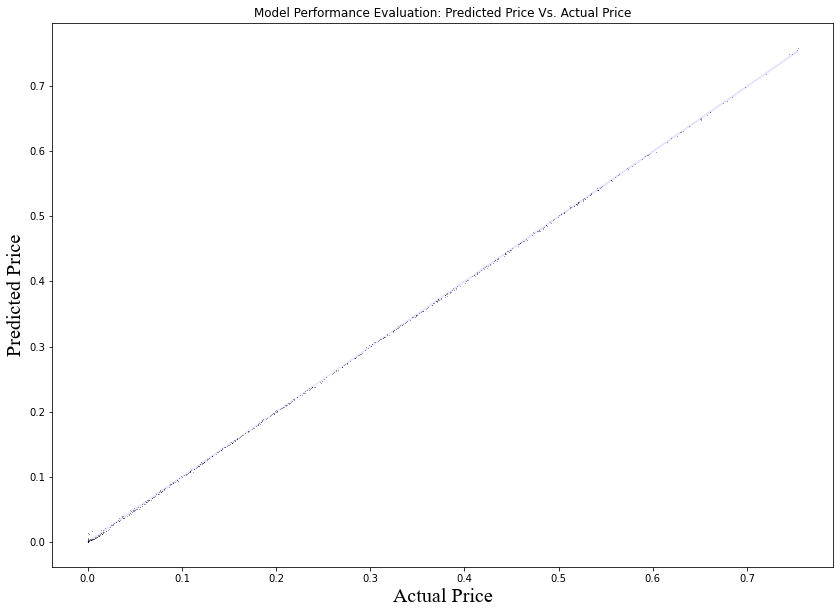

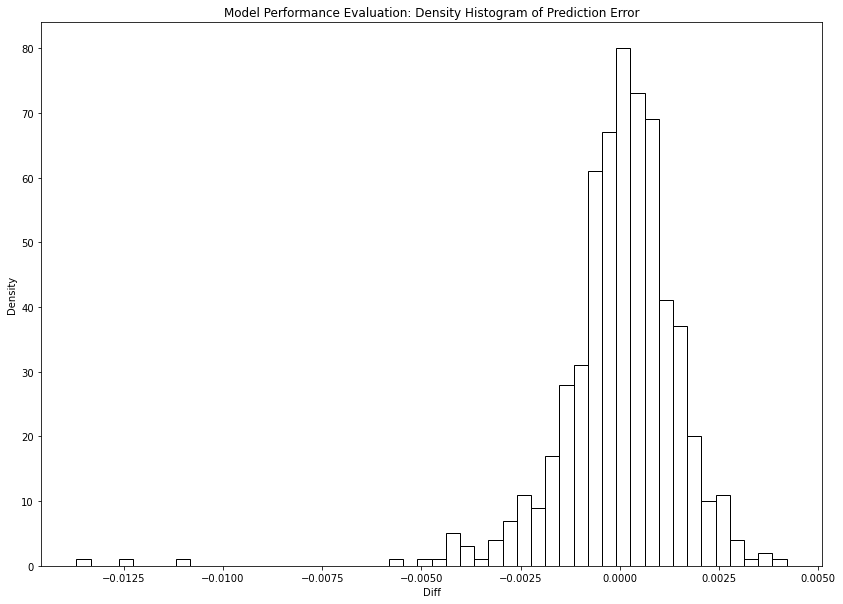

In [ ]:
# evaluating the performance of model by applying testing set into model

y2_test_hat = best_model[0].predict(X_test, verbose = 0)

y2_test_hat = np.squeeze(y2_test_hat)

a, b = CheckAccuracy('DNN relu Nodes: 100 adam Epochs: 1000', y_test, y2_test_hat)

In [ ]:
display(a, b) # display summary statistics for density histogram of errors

mse      rmse       mae       mpe
DNN relu Nodes: 100 adam Epochs: 1000  0.000003  0.001599  0.001056  0.006444

0
count  599.000000
mean    -0.000008
std      0.001600
min     -0.013690
25%     -0.000634
50%      0.000140
75%      0.000871
max      0.004200

## Appedix

In [ ]:
def view_convergence(nn_df):
  for model_name in nn_df.index:
    convergence = nn_df.loc[model_name]['convergence']

    pd.DataFrame(convergence).plot(figsize=(8,5), logy=True)
    plt.title(model_name)
    plt.ylabel('Log MSE')
    plt.xlabel('Iteration')
    plt.grid(True)

In [ ]:
# show top 5 model for tanh activation
top_tanh = all_model_df.filter(like='tanh', axis=0).sort_values(by=['mse'], ascending=True).head(5)
top_tanh

mse      rmse       mae  \
TENLAYER NN Nodes: tanh 50 adam Epochs:  1000  0.000014  0.003748  0.003213   
TENLAYER NN Nodes: tanh 100 adam Epochs:  500  0.000016     0.004  0.002741   
DNN tanh  Nodes: 100 adam Epochs: 1000         0.000027   0.00521  0.003384   
TENLAYER NN Nodes: tanh 10 adam Epochs:  1000  0.000032   0.00567  0.004271   
DNN tanh  Nodes: 50 adam Epochs: 1000          0.000035  0.005938   0.00398   

                                                    mpe  \
TENLAYER NN Nodes: tanh 50 adam Epochs:  1000  0.015103   
TENLAYER NN Nodes: tanh 100 adam Epochs:  500  0.016121   
DNN tanh  Nodes: 100 adam Epochs: 1000         0.020995   
TENLAYER NN Nodes: tanh 10 adam Epochs:  1000  0.022851   
DNN tanh  Nodes: 50 adam Epochs: 1000          0.023931   

                                                                                     convergence  
TENLAYER NN Nodes: tanh 50 adam Epochs:  1000  {'loss': [0.14333416521549225, 0.0512168034911...  
TENLAYER NN Nodes: tanh 100 adam Epochs:  500  {'loss': [0.20392121374607086, 0.0615643449127...  
DNN tanh  Nodes: 100 adam Epochs: 1000         {'loss': [0.1404147744178772, 0.06076716631650...  
TENLAYER NN Nodes: tanh 10 adam Epochs:  1000  {'loss': [0.18124163150787354, 0.0955502018332...  
DNN tanh  Nodes: 50 adam Epochs: 1000          {'loss': [0.36246079206466675, 0.0700568258762...

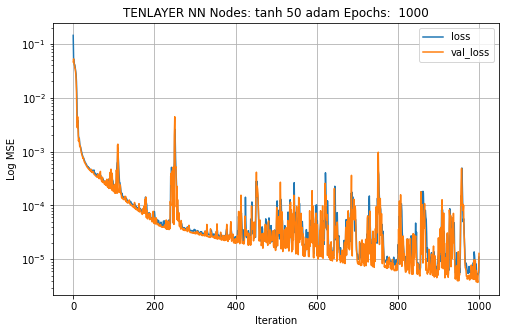

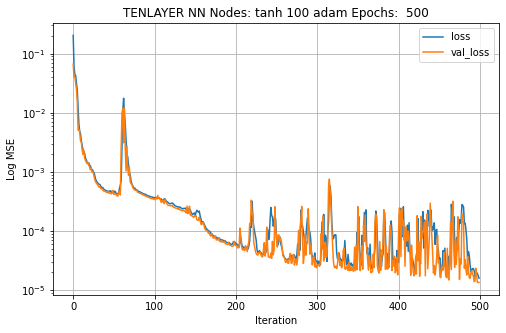

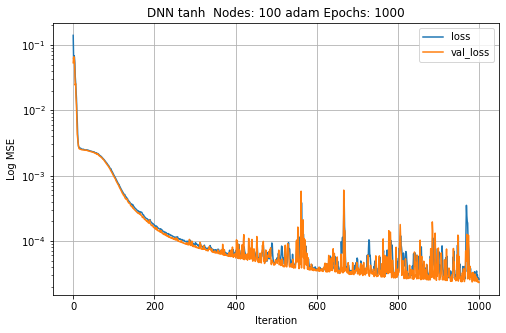

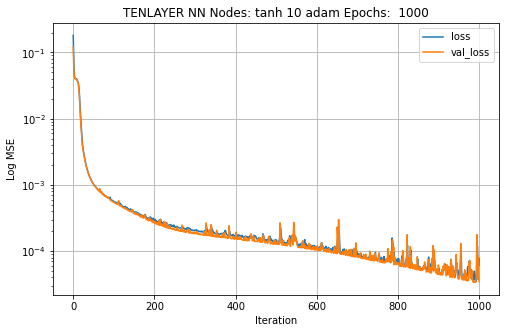

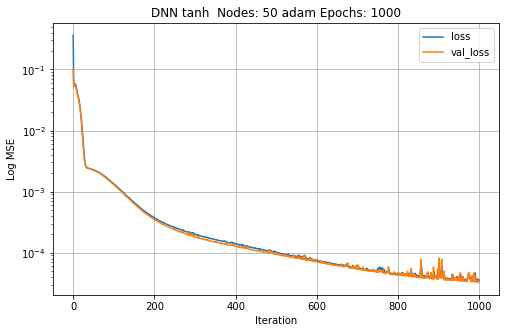

In [ ]:
view_convergence(top_tanh)

In [ ]:
# show top 5 model for sigmoid activation

top_sigmoid = all_model_df.filter(like='sigmoid', axis=0).sort_values(by=['mse'], ascending=True).head(5)
top_sigmoid

mse      rmse  \
SNN sigmoid Nodes: 300 adam Epochs: 1000          0.000046  0.006793   
DNN sigmoid  Nodes: 100 adam Epochs: 1000         0.000171   0.01308   
TENLAYER NN Nodes: sigmoid 50 adam Epochs:  1000  0.000316  0.017779   
SNN sigmoid Nodes: 300 adam Epochs: 500           0.000411  0.020272   
DNN sigmoid  Nodes: 50 adam Epochs: 500           0.000498  0.022316   

                                                       mae       mpe  \
SNN sigmoid Nodes: 300 adam Epochs: 1000          0.004545  0.027377   
DNN sigmoid  Nodes: 100 adam Epochs: 1000         0.009294  0.052713   
TENLAYER NN Nodes: sigmoid 50 adam Epochs:  1000  0.013401   0.07165   
SNN sigmoid Nodes: 300 adam Epochs: 500           0.014653  0.081697   
DNN sigmoid  Nodes: 50 adam Epochs: 500           0.015933  0.089935   

                                                                                        convergence  
SNN sigmoid Nodes: 300 adam Epochs: 1000          {'loss': [0.26115381717681885, 0.0456907525658...  
DNN sigmoid  Nodes: 100 adam Epochs: 1000         {'loss': [0.2416735142469406, 0.04298700764775...  
TENLAYER NN Nodes: sigmoid 50 adam Epochs:  1000  {'loss': [2.33048939704895, 0.864884614944458,...  
SNN sigmoid Nodes: 300 adam Epochs: 500           {'loss': [0.17287211120128632, 0.0460770800709...  
DNN sigmoid  Nodes: 50 adam Epochs: 500           {'loss': [0.06080450117588043, 0.0408786386251...

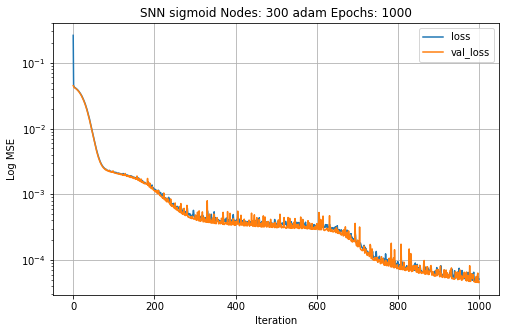

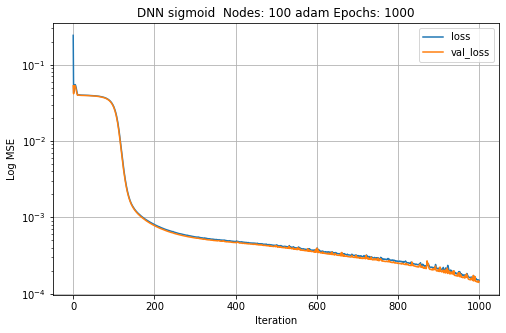

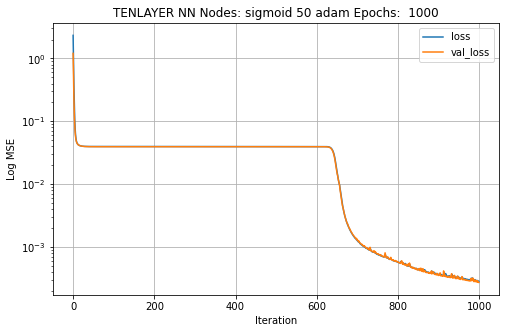

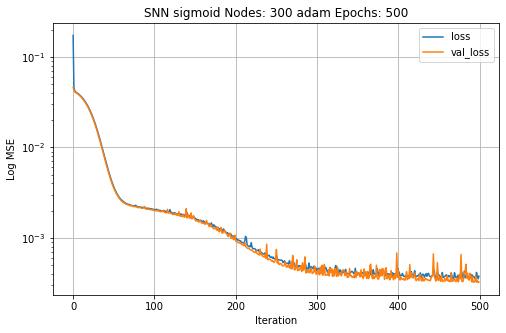

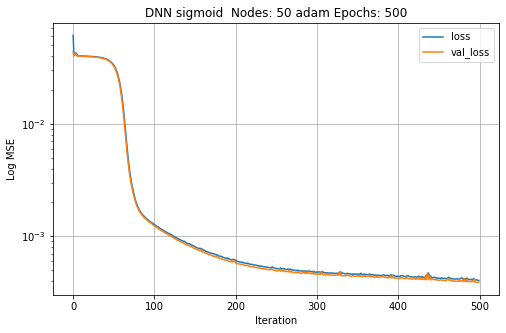

In [ ]:
view_convergence(top_sigmoid)